<span style="font-size: 18px;">Name:</span>  <span style="font-size: 18px;">**Jha Sneha Nalinikant**</span>  
<span style="font-size: 18px;">Domain:</span>  <span style="font-size: 18px;">**Data Science and Business Analytics**</span>  
<span style="font-size: 18px;">Batch:</span>  <span style="font-size: 18px;">**June 2023**</span>  
<span style="font-size: 18px;">Company:</span>  <span style="font-size: 18px;">**The Sparks Foundation (TSF)**</span>  

# Stock Market Prediction using Numerical and Textual Analysis

## Data Collection

### Stock Price Data
Here I have used Yahoo Finance API in Python to access historical stock price data. With the following code I can extract data of stock price till date

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
#!pip install yfinance



# Define the stock ticker symbol
ticker = 'NFLX'  # Replace with the desired stock ticker symbol

# Create a ticker object
stock = yf.Ticker(ticker)

# Fetch the historical stock price data
historical_data = stock.history(period='max')

# Convert the historical data to a DataFrame
data_nflx = pd.DataFrame(historical_data)


# Print the DataFrame
data_nflx
data_nflx.reset_index(inplace=True)

In [3]:
data_all = yf.download(ticker, period='max')
data_all.reset_index(inplace=True)
data_all

[*********************100%***********************]  1 of 1 completed


Date        Open        High         Low       Close   Adj Close  \
0    2002-05-23    1.156429    1.242857    1.145714    1.196429    1.196429   
1    2002-05-24    1.214286    1.225000    1.197143    1.210000    1.210000   
2    2002-05-28    1.213571    1.232143    1.157143    1.157143    1.157143   
3    2002-05-29    1.164286    1.164286    1.085714    1.103571    1.103571   
4    2002-05-30    1.107857    1.107857    1.071429    1.071429    1.071429   
...         ...         ...         ...         ...         ...         ...   
5299 2023-06-12  418.829987  424.700012  416.570007  423.970001  423.970001   
5300 2023-06-13  430.010010  437.269989  428.399994  435.730011  435.730011   
5301 2023-06-14  434.989990  447.329987  433.500000  440.859985  440.859985   
5302 2023-06-15  444.100006  448.649994  439.500000  445.269989  445.269989   
5303 2023-06-16  444.100006  445.799988  443.250000  443.596710  443.596710   

         Volume  
0     104790000  
1      11104800  
2       6609400  
3       6757800  
4      10154200  
...         ...  
5299    5959500  
5300    7820500  
5301    8413100  
5302    7093000  
5303     761867  

[5304 rows x 7 columns]

#### Features Explaination

| Feature        | Explanation                                                      |
| :------------ | :--------------------------------------------------------------- |
| Open          | The opening price of the stock indicates the price at which the stock started trading at the beginning of the day. It provides insight into the market sentiment and investor reactions since the previous trading day's close. |
| High          | The high price represents the highest trading price reached by the stock during the trading day. It indicates the peak price level the stock reached before any potential downward movement. |
| Low           | The low price represents the lowest trading price reached by the stock during the trading day. It indicates the bottom price level the stock touched before any potential upward movement. |
| Close         | The closing price is the final price at which the stock traded before the market closed for the day. It is considered a significant price as it reflects the overall sentiment of investors at the end of the trading day. |
| Volume        | The volume refers to the total number of shares traded during the trading day. It indicates the level of market activity and liquidity for the stock. Higher volume often signifies increased investor interest and potential price volatility. |
| Dividends     | Dividends are payments made by a company to its shareholders out of its earnings. This column shows any dividends paid out to shareholders on the trading day. Dividends are typically distributed periodically and provide income to investors. |
| Stock Splits  | A stock split occurs when a company divides its existing shares into multiple shares. This column indicates the ratio at which the stock was split, if any, during the trading day. Stock splits are often carried out to make shares more accessible to investors and increase liquidity. |


### News Headlines Data using API

Here insted of making use outdated data given by spark I collected the fresh data from **NewsApi** and **Bing News API** of Azure Resources which I got from Microsoft Azure Students Plan. I used 'Netfilx' as query of search to get data relevent to netflix. You can use any kind of data

1. Import the necessary libraries:
   - `requests` for making API requests
   - `pandas` for data manipulation
--------
2. Set up the API endpoint and parameters:
   - Define the API endpoint URL and your API key
   - Set the desired parameters like query term, sources, date range, language, etc.
--------
3. Make the API request:
   - Use the `requests.get()` method to send a GET request to the API endpoint
   - Pass the API key and other parameters as query parameters in the request URL
--------
4. Check the response status:
   - Verify the response status code
   - If the status code is 200, the request was successful
--------
5. Extract the news articles:
   - Parse the JSON response using `response.json()`
   - Extract the articles data from the response
--------
6. Prepare the data:
   - Extract relevant information from each article (publication date, headline, source, etc.)
   - Store the information in a suitable data structure
--------
7. Create a DataFrame:
   - Use pandas to create a DataFrame from the extracted data
   - Assign appropriate column names to the DataFrame
--------
8. Perform further processing or save the data:
   - Perform additional processing or analysis on the DataFrame
   - Filter articles based on criteria, perform sentiment analysis, etc.
   - Save the data to a CSV file or any other desired format
--------




#### Image of NewsApi Code

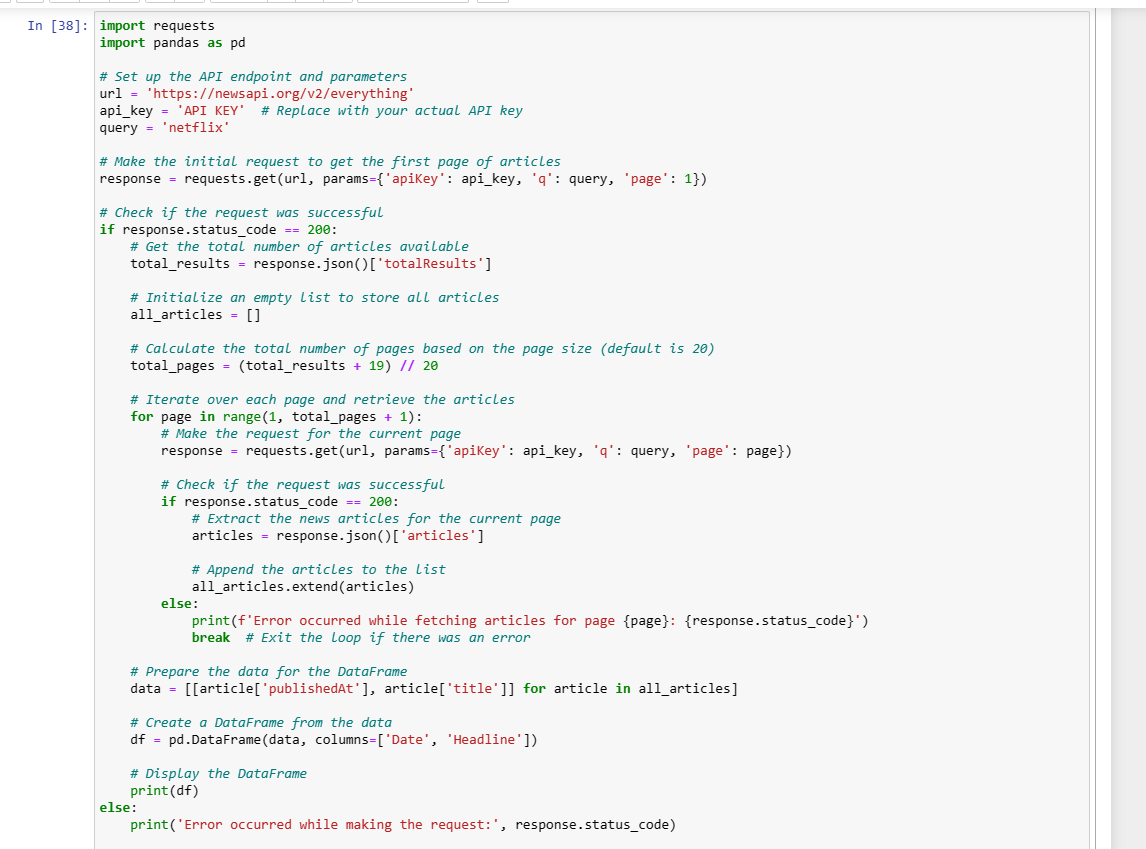




#### Image of Bing News API Code
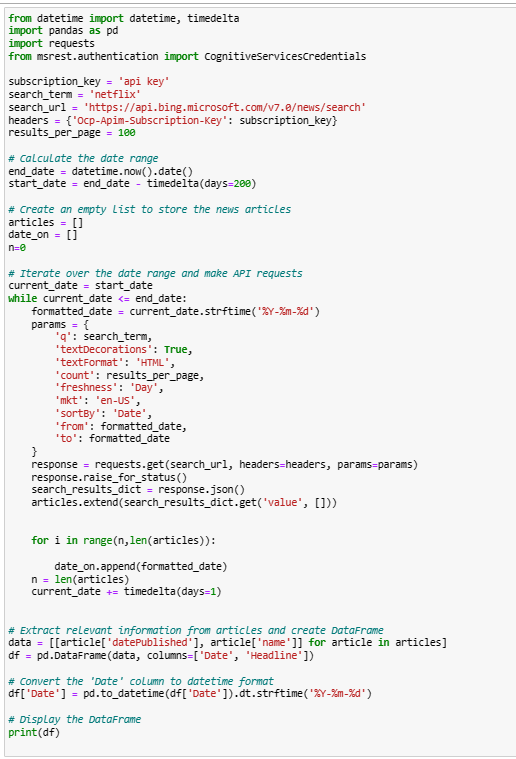



The data obatined from both the APIs was saved in csv file

#### Data Obtained

In [4]:
news_api_netfix_data1 = pd.read_csv('netflix_news2.csv')
news_api_netfix_data2 = pd.read_csv('netflix_news3.csv')
news_api_netfix_data3 = pd.read_csv('news_data_5june.csv')
news_api_netfix_data4 = pd.read_csv('news_data5june2.csv')
news_api_netfix_data5 = pd.read_csv('news_data5june3.csv')
news_api_netfix_data = pd.concat([news_api_netfix_data1, news_api_netfix_data2, news_api_netfix_data3, news_api_netfix_data4,news_api_netfix_data5], axis=0)

In [5]:
news_api_netfix_data.duplicated().sum()

780

In [6]:
news_api_netfix_data = news_api_netfix_data.drop_duplicates()


In [7]:
news_api_netfix_data.reset_index(drop=True, inplace=True)
news_api_netfix_data

Date                                           Headline
0    2023-05-23T18:51:33Z  Netflix starts charging for account sharing in...
1    2023-05-23T10:45:54Z  Netflix makes it easier to find titles you've ...
2    2023-05-22T18:16:14Z  Netflix is making it easier to find saved show...
3    2023-05-06T13:30:27Z  Netflix is launching a remastered 'World of Go...
4    2023-05-11T15:56:41Z  Netflix canceled its in-person upfront, probab...
..                    ...                                                ...
515  2023-06-02T22:48:17Z  Netflix investors voted against rich pay packa...
516  2023-06-03T13:00:00Z  The 7 best movies new to streaming on Netflix,...
517  2023-06-03T14:30:00Z  Disney Gets Big Write-Off After Pulling Its St...
518  2023-06-02T22:25:37Z  Don’t Look Up director Adam McKay to triple do...
519  2023-06-04T13:00:58Z  Un año después, Netflix tiene el mismo problem...

[520 rows x 2 columns]

In [8]:
bing_netfilx_data = pd.read_csv('netfilx_date_on_pro_dates.csv')

In [9]:
bing_netfilx_data

Date                                           Headline  \
0      2023-06-03  Why ‘Bridgerton’ and ‘Queen Charlotte’ are mor...   
1      2023-06-03  Los Angeles Councilmembers Repping Hollywood I...   
2      2023-06-03  Books Over Streaming Services: Here’s What the...   
3      2023-06-03  When will Spider-Man: Across the Spider-Verse ...   
4      2023-06-03  <b>Netflix</b> Switches To Virtual Upfront Pre...   
...           ...                                                ...   
10457  2023-06-02  King Charles &#39;Breathing Sigh of Relief&#39...   
10458  2023-06-02  Where to Watch and Stream Distrito salvaje Sea...   
10459  2023-06-02  ThnkLab Takes Home Gold, Silver, and Bronze at...   
10460  2023-06-02  The legend of Geno Bonnalie: Anonymous caddie ...   
10461  2023-06-02  &#39;Never Have I Ever&#39;: Maitreyi Ramakris...   

      Date_Searched  
0        2023-06-03  
1        2023-06-03  
2        2023-06-03  
3        2023-06-03  
4        2023-06-03  
...             ...  
10457    2022-11-15  
10458    2022-11-15  
10459    2022-11-15  
10460    2022-11-15  
10461    2022-11-15  

[10462 rows x 3 columns]

In [10]:
india_news_headlines = pd.read_csv('india-news-headlines.csv/india-news-headlines.csv')
india_news_headlines['publish_date'] = pd.to_datetime(india_news_headlines['publish_date'], format='%Y%m%d')
india_news_headlines

publish_date              headline_category  \
0         2001-01-02                        unknown   
1         2001-01-02                        unknown   
2         2001-01-02                        unknown   
3         2001-01-02                        unknown   
4         2001-01-02                        unknown   
...              ...                            ...   
3650965   2022-03-31                  city.srinagar   
3650966   2022-03-31  entertainment.hindi.bollywood   
3650967   2022-03-31                    city.trichy   
3650968   2022-03-31                     city.erode   
3650969   2022-03-31                     city.salem   

                                             headline_text  
0        Status quo will not be disturbed at Ayodhya; s...  
1                      Fissures in Hurriyat over Pak visit  
2                    America's unwanted heading for India?  
3                       For bigwigs; it is destination Goa  
4                     Extra buses to clear tourist traffic  
...                                                    ...  
3650965  J&K sacks 2 cops; 3 other employees over terro...  
3650966  Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...  
3650967  As Covid-19 cases drop to nil in southern dist...  
3650968  Tamil Nadu sees marginal rise of Covid cases w...  
3650969  Tamil Nadu sees marginal rise of Covid cases w...  

[3650970 rows x 3 columns]

## Data Preprocessing

### Stock Price Data

In [11]:
data_nflx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          5303 non-null   datetime64[ns, America/New_York]
 1   Open          5303 non-null   float64                         
 2   High          5303 non-null   float64                         
 3   Low           5303 non-null   float64                         
 4   Close         5303 non-null   float64                         
 5   Volume        5303 non-null   int64                           
 6   Dividends     5303 non-null   float64                         
 7   Stock Splits  5303 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 331.6 KB


Above Step indicated that there is no missing values in the given data

In [12]:
data_nflx.describe()

Open         High          Low        Close        Volume  \
count  5303.000000  5303.000000  5303.000000  5303.000000  5.303000e+03   
mean    124.743945   126.707886   122.713967   124.771275  1.617276e+07   
std     169.140192   171.608953   166.514672   169.110686  1.887953e+07   
min       0.377857     0.410714     0.346429     0.372857  2.856000e+05   
25%       4.065000     4.142857     3.965000     4.068571  6.096700e+06   
50%      31.121429    31.830000    30.571428    31.139999  1.030470e+07   
75%     199.659996   202.224998   196.110001   199.485001  1.914735e+07   
max     692.349976   700.989990   686.090027   691.690002  3.234140e+08   

       Dividends  Stock Splits  
count     5303.0   5303.000000  
mean         0.0      0.001697  
std          0.0      0.099967  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      7.000000

In the above step we checked that is there any outlire. But in stock prices its possible that on some days stock price goes much above than expected

In [13]:

stock_split_days = data_nflx[data_nflx['Stock Splits']>1]
stock_split_days.reset_index(inplace=True)
stock_split_days

index                      Date       Open    High        Low      Close  \
0    434 2004-02-12 00:00:00-05:00   5.195714    5.41   5.037143   5.328571   
1   3308 2015-07-15 00:00:00-04:00  99.970001  100.75  97.050003  98.129997   

     Volume  Dividends  Stock Splits  
0  39651500        0.0           2.0  
1  30898600        0.0           7.0

We are looking on which days split was done to find if there would be any trend change or something after that.

now we will perform the steps of adjusting for stock splits and dividends in data preprocessing to ensure that the historical stock prices accurately reflect the true value of the stock and eliminate any distortions caused by these events. Here's the rationale behind each step:

1. Adjusting for stock splits:
   - Stock splits are events where a company increases the number of its outstanding shares while proportionally decreasing the price per share.
   - By adjusting for stock splits, we bring the stock prices to a common scale, allowing for accurate analysis and comparison across different time periods.
   - Dividing the closing prices by the cumulative product of the stock splits adjusts the prices based on the split ratio, providing the pre-split value of the stock.

2. Adjusting for dividends:
   - Dividends are payments made by a company to its shareholders out of its profits.
   - When a dividend is paid, the stock price typically decreases by the dividend amount to account for the distribution of earnings.
   - Subtracting the dividend amounts from the adjusted close prices ensures that the impact of dividends on the stock prices is considered, allowing for a more accurate representation of the stock's performance.

By performing these adjustments, we create a column of adjusted stock prices that removes the effects of stock splits and dividends, providing a clearer picture of the stock's actual price movements over time. This adjusted data is crucial for various financial analyses, such as technical analysis, forecasting, and comparing stock performance across different time periods.

In [14]:

data_nflx['Stock Splits'].replace(0, 1, inplace=True)

# Adjusting for stock splits
data_nflx['Adjusted Close'] = data_nflx['Close'] / data_nflx['Stock Splits']

# Adjusting for dividends
data_nflx['Adjusted Close'] = data_nflx['Adjusted Close'] - data_nflx['Dividends']

# Drop the unnecessary columns
data_preprocessed = data_nflx[['Date', 'Adjusted Close']]


# The resulting DataFrame will have the adjusted close prices after accounting for stock splits and dividends
data_preprocessed


Date  Adjusted Close
0    2002-05-23 00:00:00-04:00        1.196429
1    2002-05-24 00:00:00-04:00        1.210000
2    2002-05-28 00:00:00-04:00        1.157143
3    2002-05-29 00:00:00-04:00        1.103571
4    2002-05-30 00:00:00-04:00        1.071429
...                        ...             ...
5298 2023-06-09 00:00:00-04:00      420.019989
5299 2023-06-12 00:00:00-04:00      423.970001
5300 2023-06-13 00:00:00-04:00      435.730011
5301 2023-06-14 00:00:00-04:00      440.859985
5302 2023-06-15 00:00:00-04:00      445.269989

[5303 rows x 2 columns]

In [15]:
data_preprocessed.describe()

Adjusted Close
count     5303.000000
mean       124.754911
std        169.117488
min          0.372857
25%          4.067857
50%         31.105715
75%        199.485001
max        691.690002

### Preprocessing news headlines for sentimental analysis

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize



# Define the text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]

    # Join the preprocessed tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

# Apply text preprocessing to the 'Headline' column
news_api_netfix_data['Headline_preprocessed'] = news_api_netfix_data['Headline'].apply(preprocess_text)
bing_netfilx_data['Headline_preprocessed'] = bing_netfilx_data['Headline'].apply(preprocess_text)


In [17]:
bing_netfilx_data['Headline_preprocessed'] = bing_netfilx_data['Headline'].apply(preprocess_text)

In [18]:
# from tqdm import tqdm

# # Create an empty list to store the preprocessed headlines
# preprocessed_headlines = []

# # Iterate over the rows of the DataFrame
# for index, row in tqdm(india_news_headlines.iterrows(), total=len(india_news_headlines), desc='Preprocessing progress'):
#     # Get the headline text from the 'headline_text' column
#     headline_text = row['headline_text']

#     # Preprocess the text
#     preprocessed_text = preprocess_text(headline_text)

#     # Append the preprocessed text to the list
#     preprocessed_headlines.append(preprocessed_text)

# # Assign the preprocessed headlines to the 'headline_text_preprocessed' column
# india_news_headlines['headline_text_preprocessed'] = preprocessed_headlines

# # Print the preprocessed headlines
# print(india_news_headlines)

In [19]:
# india_news_headlines.to_csv('india-news-headlines_preprocessed.csv', index=False)

In [20]:
india_news_headlines_preprocessed = pd.read_csv('india-news-headlines_preprocessed.csv')

In [21]:
news_api_netfix_data

Date                                           Headline  \
0    2023-05-23T18:51:33Z  Netflix starts charging for account sharing in...   
1    2023-05-23T10:45:54Z  Netflix makes it easier to find titles you've ...   
2    2023-05-22T18:16:14Z  Netflix is making it easier to find saved show...   
3    2023-05-06T13:30:27Z  Netflix is launching a remastered 'World of Go...   
4    2023-05-11T15:56:41Z  Netflix canceled its in-person upfront, probab...   
..                    ...                                                ...   
515  2023-06-02T22:48:17Z  Netflix investors voted against rich pay packa...   
516  2023-06-03T13:00:00Z  The 7 best movies new to streaming on Netflix,...   
517  2023-06-03T14:30:00Z  Disney Gets Big Write-Off After Pulling Its St...   
518  2023-06-02T22:25:37Z  Don’t Look Up director Adam McKay to triple do...   
519  2023-06-04T13:00:58Z  Un año después, Netflix tiene el mismo problem...   

                                 Headline_preprocessed  
0                  netflix start charg account share u  
1    netflix make easier find titl 've ad list n't ...  
2    netflix make easier find save show movi still ...  
3          netflix launch remast 'world goo ' may 23rd  
4    netflix cancel in-person upfront , probabl avo...  
..                                                 ...  
515  netflix investor vote rich pay packag compani ...  
516  7 best movi new stream netflix , max , prime v...  
517          disney get big write-off pull stream show  
518    ’ look director adam mckay tripl donat stop oil  
519  un año despué , netflix tien el mismo problema...  

[520 rows x 3 columns]

In [22]:
bing_netfilx_data

Date                                           Headline  \
0      2023-06-03  Why ‘Bridgerton’ and ‘Queen Charlotte’ are mor...   
1      2023-06-03  Los Angeles Councilmembers Repping Hollywood I...   
2      2023-06-03  Books Over Streaming Services: Here’s What the...   
3      2023-06-03  When will Spider-Man: Across the Spider-Verse ...   
4      2023-06-03  <b>Netflix</b> Switches To Virtual Upfront Pre...   
...           ...                                                ...   
10457  2023-06-02  King Charles &#39;Breathing Sigh of Relief&#39...   
10458  2023-06-02  Where to Watch and Stream Distrito salvaje Sea...   
10459  2023-06-02  ThnkLab Takes Home Gold, Silver, and Bronze at...   
10460  2023-06-02  The legend of Geno Bonnalie: Anonymous caddie ...   
10461  2023-06-02  &#39;Never Have I Ever&#39;: Maitreyi Ramakris...   

      Date_Searched                              Headline_preprocessed  
0        2023-06-03  ‘ bridgerton ’ ‘ queen charlott ’ regenc roman...  
1        2023-06-03  lo angel councilmemb rep hollywood issu resolu...  
2        2023-06-03         book stream servic : ’ ceo top publish say  
3        2023-06-03  spider-man : across spider-vers hit stream ? d...  
4        2023-06-03  < b > netflix < /b > switch virtual upfront pr...  
...             ...                                                ...  
10457    2022-11-15  king charl & # 39 ; breath sigh relief & # 39 ...  
10458    2022-11-15   watch stream distrito salvaj season 1 free onlin  
10459    2022-11-15  thnklab take home gold , silver , bronz 44th a...  
10460    2022-11-15  legend geno bonnali : anonym caddi becom famou...  
10461    2022-11-15  & # 39 ; never ever & # 39 ; : maitreyi ramakr...  

[10462 rows x 4 columns]

## Making Indian news Headlines data short

In [23]:
# Dropping duplicates
india_news_headlines = india_news_headlines.drop_duplicates()

# Converting the datatype of column 'Date' from type string to type 'datetime'
india_news_headlines['publish_date'] = india_news_headlines['publish_date'].astype(str)
india_news_headlines['publish_date'] = pd.to_datetime(india_news_headlines['publish_date']).dt.normalize()

# Filtering the important columns
india_news_headlines = india_news_headlines.filter(['publish_date', 'headline_text'])

# Grouping the news headlines according to Date
india_news_headlines = india_news_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

# Setting Date as the index column
india_news_headlines.set_index('publish_date', inplace=True)

# Sorting the data according to the Date
india_news_headlines = india_news_headlines.sort_index(ascending=True, axis=0)

india_news_headlines.reset_index('publish_date', inplace=True)
india_news_headlines

publish_date                                      headline_text
0      2001-01-02  Status quo will not be disturbed at Ayodhya; s...
1      2001-01-03  Powerless north India gropes in the dark,Think...
2      2001-01-04  The string that pulled Stephen Hawking to Indi...
3      2001-01-05  Light combat craft takes India into club class...
4      2001-01-06  Light combat craft takes India into club class...
...           ...                                                ...
7712   2022-03-27  Playing a dead man in Body God meant sitting i...
7713   2022-03-28  As fashion becomes democratic; demand for styl...
7714   2022-03-29  Bobby Deol: Like my dad; I hope to be working ...
7715   2022-03-30  I will not give in to trends: Dossmode,The tim...
7716   2022-03-31  Shashank goes back to coastal Karnataka and Mo...

[7717 rows x 2 columns]

In [24]:
# # from tqdm import tqdm

# # Create an empty list to store the preprocessed headlines
# preprocessed_headlines = []

# # Iterate over the rows of the DataFrame
# for index, row in tqdm(india_news_headlines.iterrows(), total=len(india_news_headlines), desc='Preprocessing progress'):
#     # Get the headline text from the 'headline_text' column
#     headline_text = row['headline_text']

#     # Preprocess the text
#     preprocessed_text = preprocess_text(headline_text)

#     # Append the preprocessed text to the list
#     preprocessed_headlines.append(preprocessed_text)

# # Assign the preprocessed headlines to the 'headline_text_preprocessed' column
# india_news_headlines['headline_text_preprocessed'] = preprocessed_headlines

# # Print the preprocessed headlines
# print(india_news_headlines)

In [25]:
#india_news_headlines.to_csv('india-news-headlines_preprocessed_merged.csv', index=False)

As you can see data is preprocessed

## Numerical Analysis

##### Ploting closing Price of Netflix
Also Indicating the dates when it was split
As we can see when stock was intnitally split into two no significant diffrence was there. but we can see that during 2015 there was sudden increse in demand of netflix shares which resulted in good increase. A sudden rise can be observed in day when it was split into 7 parts

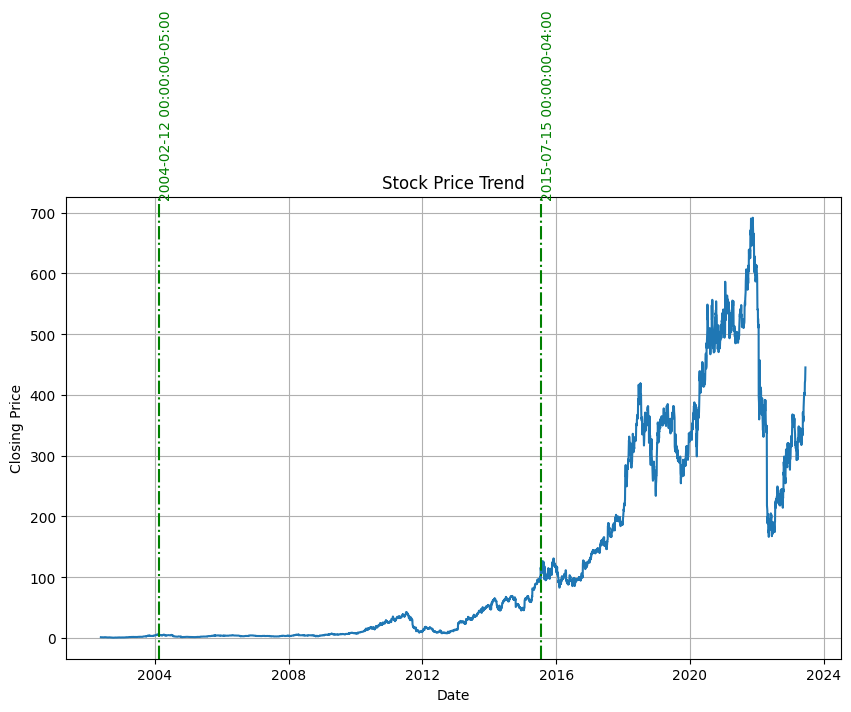

In [26]:
import matplotlib.pyplot as plt

# Plotting the closing price
plt.figure(figsize=(10, 6))
plt.plot(data_nflx['Date'], data_nflx['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Trend')
plt.axvline(x=stock_split_days['Date'].iloc[0], color='green', linestyle='-.')
plt.axvline(x=stock_split_days['Date'].iloc[1], color='green', linestyle='-.')
plt.text(stock_split_days['Date'].iloc[0], plt.ylim()[-1], str(stock_split_days['Date'].iloc[0]), color='green', rotation='vertical')
plt.text(stock_split_days['Date'].iloc[1], plt.ylim()[-1], str(stock_split_days['Date'].iloc[1]), color='green', rotation='vertical')

plt.grid(True)
plt.show()


##### Ploting Adjusted Closing Price.

As we can see there is no visible diffrence between both

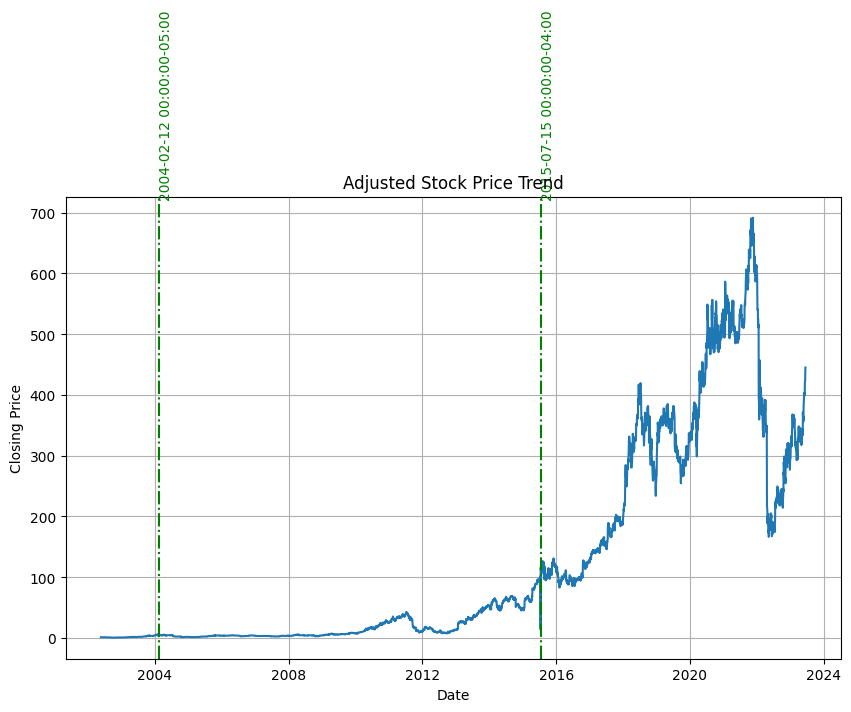

In [27]:

plt.figure(figsize=(10, 6))
plt.plot(data_nflx['Date'], data_nflx['Adjusted Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Adjusted Stock Price Trend')
plt.axvline(x=stock_split_days['Date'].iloc[0], color='green', linestyle='-.')
plt.axvline(x=stock_split_days['Date'].iloc[1], color='green', linestyle='-.')
plt.text(stock_split_days['Date'].iloc[0], plt.ylim()[-1], str(stock_split_days['Date'].iloc[0]), color='green', rotation='vertical')
plt.text(stock_split_days['Date'].iloc[1], plt.ylim()[-1], str(stock_split_days['Date'].iloc[1]), color='green', rotation='vertical')

plt.grid(True)
plt.show()


we can also observe from both the plots that trend is Upward Trend (Bullish) overall

##### Comparing trends with Competitors

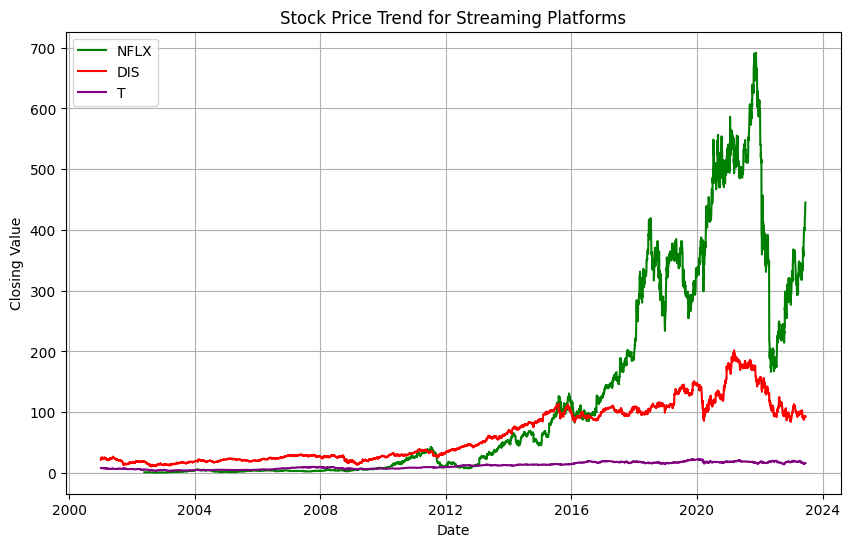

In [28]:

def plot_closing_values(tickers):
    colors = ['green', 'red', 'purple']
    plt.figure(figsize=(10, 6))

    for i, ticker in enumerate(tickers):
        # Create a ticker object
        stock = yf.Ticker(ticker)

        # Fetch the historical stock price data
        historical_data = stock.history(start='2001-01-01')

        # Convert the historical data to a DataFrame
        data = pd.DataFrame(historical_data)

        # Extract the dates and closing values
        dates = data.index
        closing_values = data['Close']

        # Plot the closing values against the dates with different colors
        plt.plot(dates, closing_values, label=ticker, color=colors[i])

    plt.xlabel('Date')
    plt.ylabel('Closing Value')
    plt.title('Stock Price Trend for Streaming Platforms')
    plt.grid(True)
    plt.legend()
    plt.show()


tickers = ['NFLX', 'DIS', 'T']
plot_closing_values(tickers)


[*********************100%***********************]  9 of 9 completed

2 Failed downloads:
- VIAC: No timezone found, symbol may be delisted
- DISCA: No timezone found, symbol may be delisted


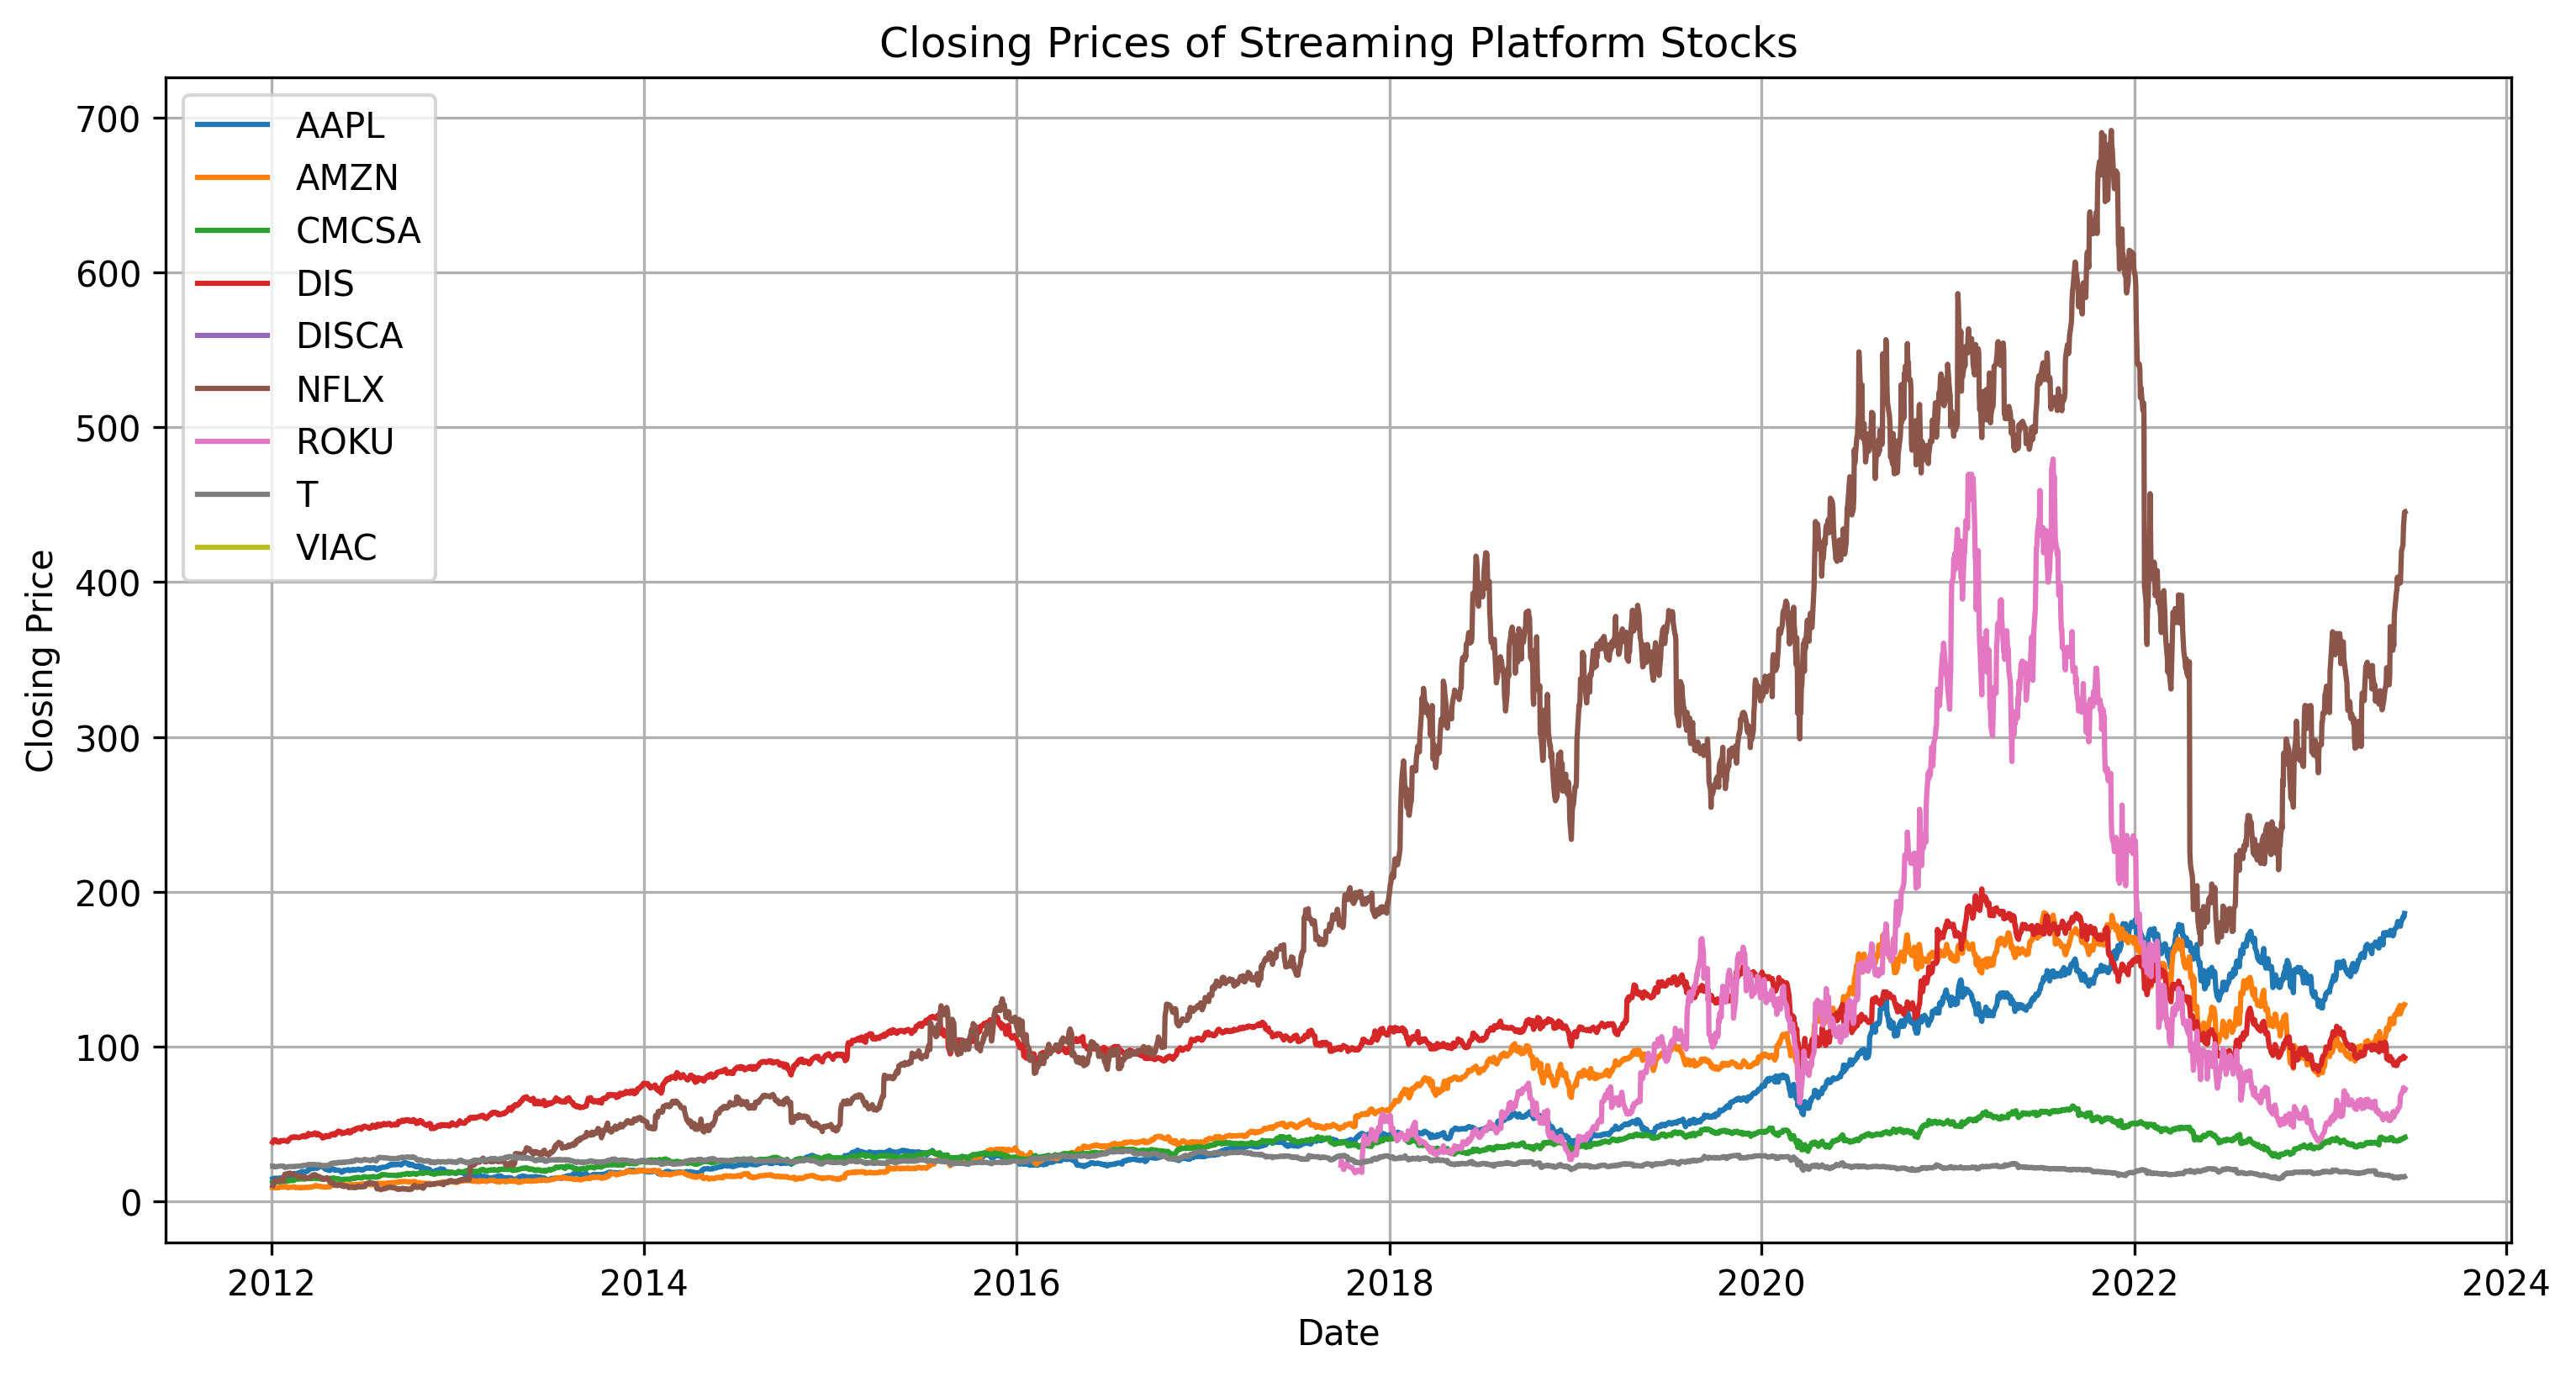

In [29]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbols for the streaming platforms
ticker_symbols = ['AMZN', 'NFLX', 'DIS', 'T', 'AAPL', 'ROKU', 'DIS', 'CMCSA', 'VIAC', 'DISCA']

# Fetch the historical stock price data for each ticker symbol
data = yf.download(ticker_symbols, start='2012-01-01')

# Extract the 'Close' prices from the data
closing_prices = data['Close']

# Plotting the closing prices for each streaming platform
plt.figure(figsize=(12, 6),dpi=300)
for ticker in closing_prices.columns:
    plt.plot(closing_prices.index, closing_prices[ticker], label=ticker)

plt.title('Closing Prices of Streaming Platform Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


##### Ploting Moving average

[*********************100%***********************]  1 of 1 completed


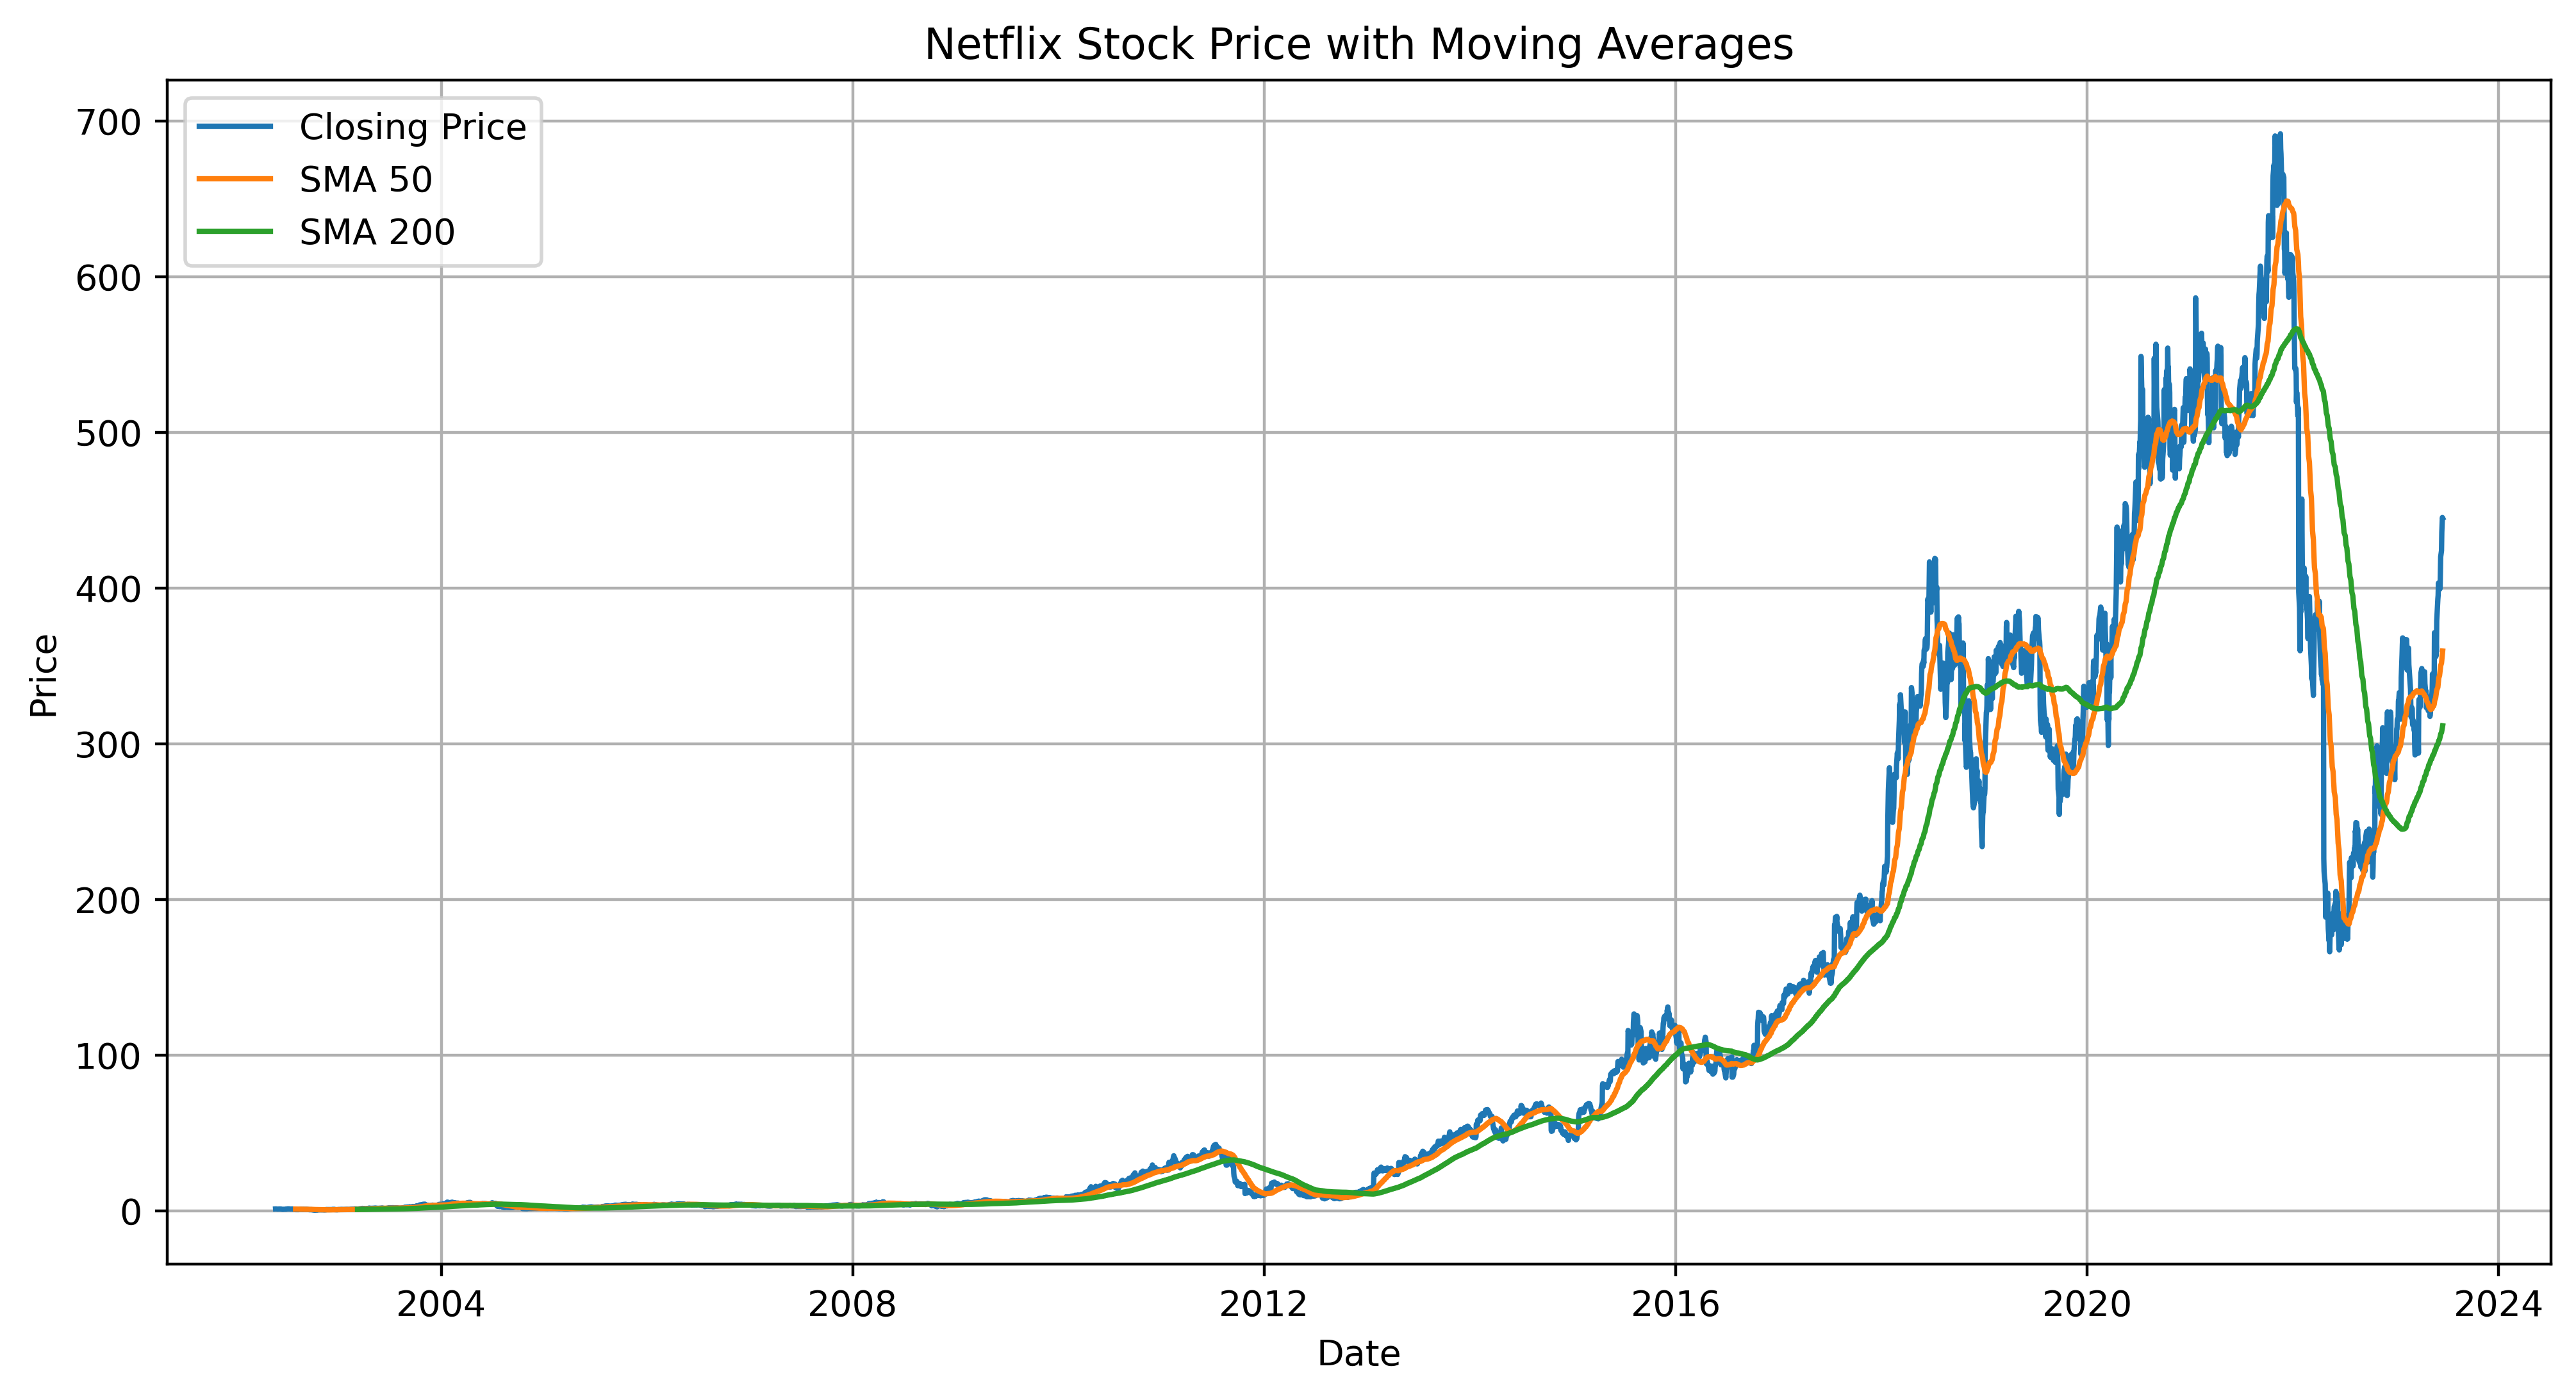

In [30]:
ticker = 'NFLX'

# Fetch the historical stock price data
data = yf.download(ticker, period='max')

# Extract the 'Close' prices from the data
closing_prices = data['Adj Close']

# Calculate the moving averages
sma_50 = closing_prices.rolling(window=50).mean()
sma_200 = closing_prices.rolling(window=200).mean()

# Plotting the closing prices and moving averages
plt.figure(figsize=(12, 6),dpi=400)
plt.plot(closing_prices.index, closing_prices, label='Closing Price')
plt.plot(sma_50.index, sma_50, label='SMA 50')
plt.plot(sma_200.index, sma_200, label='SMA 200')

plt.title('Netflix Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

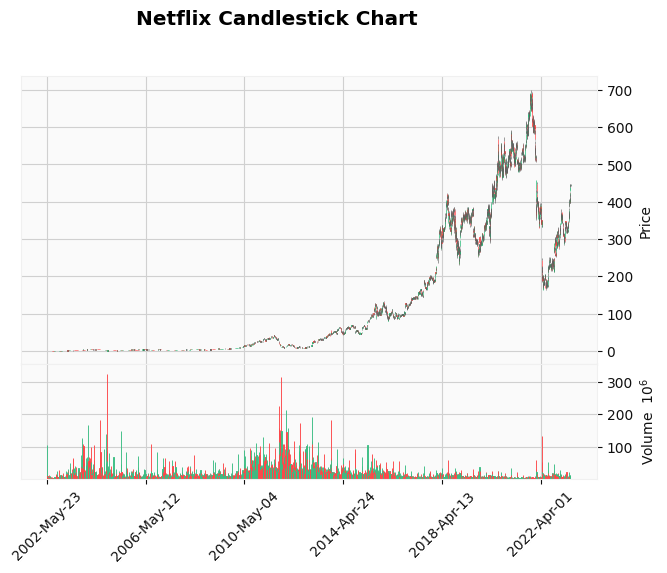

<function mplfinance.plotting.plot(data, **kwargs)>

In [31]:
import mplfinance as mpf
import matplotlib.pyplot as plt

# Set the style of the plot
style = 'yahoo'

# Plot the candlestick chart
mpf.plot(data, type='candle', volume=True, style=style, title='Netflix Candlestick Chart')

mpf.plot

<Figure size 1200x1200 with 0 Axes>

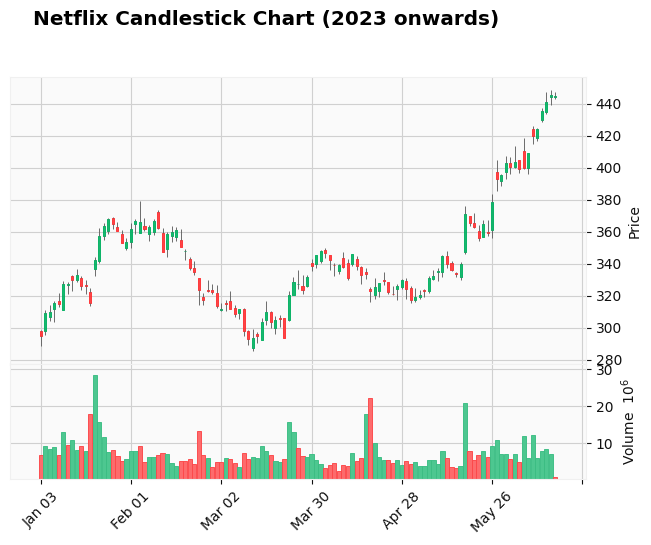

In [32]:
data_2023 = data[data.index >= '2023-01-01']

# Plot the candlestick chart
plt.figure(figsize=(12, 12))
mpf.plot(data_2023, type='candle', volume=True, style=style, title='Netflix Candlestick Chart (2023 onwards)')

# Show the plot
plt.show()

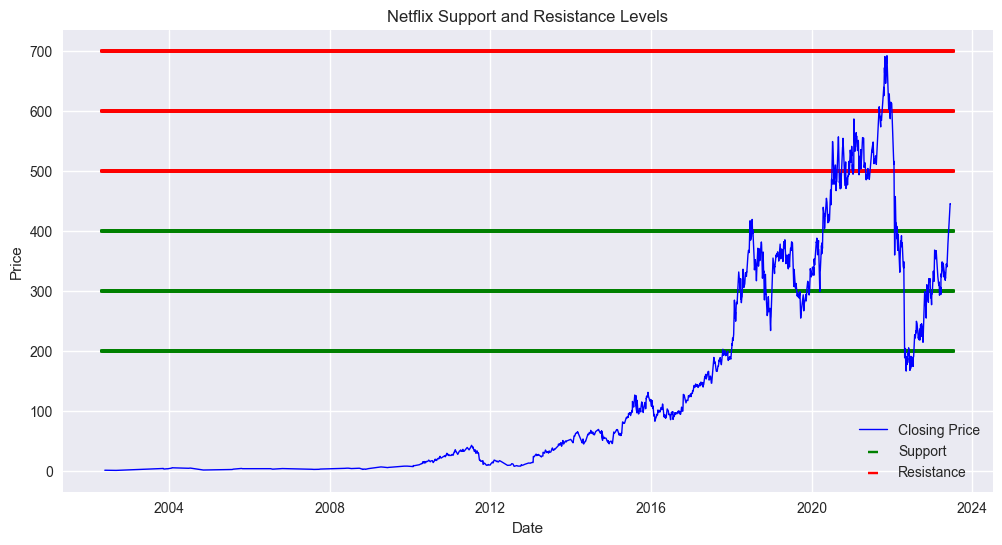

In [33]:



# Set the style of the plot
plt.style.use('seaborn')

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], color='blue', linewidth=1, label='Closing Price')

# Identify support and resistance levels
support_levels = [200, 300, 400]  # Example support levels
resistance_levels = [500, 600, 700]  # Example resistance levels

# Plot support levels
plt.scatter(data.index, [support_levels[0]] * len(data), color='green', marker='_', label='Support')
plt.scatter(data.index, [support_levels[1]] * len(data), color='green', marker='_')
plt.scatter(data.index, [support_levels[2]] * len(data), color='green', marker='_')

# Plot resistance levels
plt.scatter(data.index, [resistance_levels[0]] * len(data), color='red', marker='_', label='Resistance')
plt.scatter(data.index, [resistance_levels[1]] * len(data), color='red', marker='_')
plt.scatter(data.index, [resistance_levels[2]] * len(data), color='red', marker='_')

# Set the plot title and labels
plt.title('Netflix Support and Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Price')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [34]:
data_nflx

Date        Open        High         Low  \
0    2002-05-23 00:00:00-04:00    1.156429    1.242857    1.145714   
1    2002-05-24 00:00:00-04:00    1.214286    1.225000    1.197143   
2    2002-05-28 00:00:00-04:00    1.213571    1.232143    1.157143   
3    2002-05-29 00:00:00-04:00    1.164286    1.164286    1.085714   
4    2002-05-30 00:00:00-04:00    1.107857    1.107857    1.071429   
...                        ...         ...         ...         ...   
5298 2023-06-09 00:00:00-04:00  424.500000  425.899994  414.760010   
5299 2023-06-12 00:00:00-04:00  418.829987  424.700012  416.570007   
5300 2023-06-13 00:00:00-04:00  430.010010  437.269989  428.399994   
5301 2023-06-14 00:00:00-04:00  434.989990  447.329987  433.500000   
5302 2023-06-15 00:00:00-04:00  444.100006  448.649994  439.500000   

           Close     Volume  Dividends  Stock Splits  Adjusted Close  
0       1.196429  104790000        0.0           1.0        1.196429  
1       1.210000   11104800        0.0           1.0        1.210000  
2       1.157143    6609400        0.0           1.0        1.157143  
3       1.103571    6757800        0.0           1.0        1.103571  
4       1.071429   10154200        0.0           1.0        1.071429  
...          ...        ...        ...           ...             ...  
5298  420.019989   12363000        0.0           1.0      420.019989  
5299  423.970001    5959500        0.0           1.0      423.970001  
5300  435.730011    7820500        0.0           1.0      435.730011  
5301  440.859985    8413100        0.0           1.0      440.859985  
5302  445.269989    7093000        0.0           1.0      445.269989  

[5303 rows x 9 columns]

In [35]:


# Calculate correlation coefficients
correlation_matrix = data_nflx[['Close', 'Volume', 'Open', 'Adjusted Close']].corr()

# Print the correlation matrix
print(correlation_matrix)


                   Close    Volume      Open  Adjusted Close
Close           1.000000 -0.273100  0.999672        0.999977
Volume         -0.273100  1.000000 -0.273246       -0.273166
Open            0.999672 -0.273246  1.000000        0.999648
Adjusted Close  0.999977 -0.273166  0.999648        1.000000


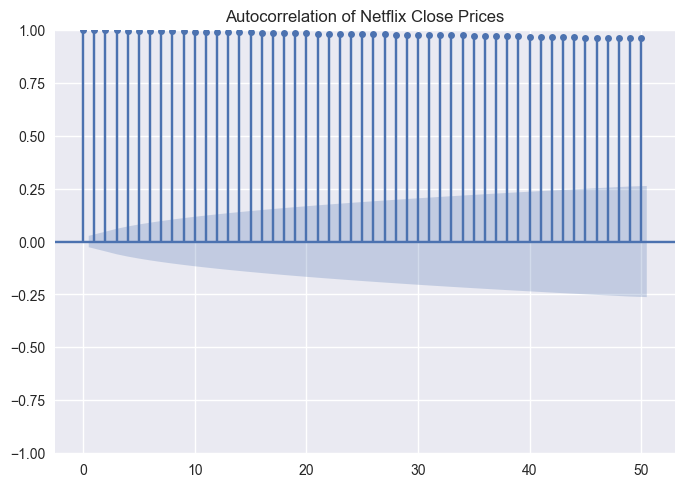

In [36]:
from statsmodels.graphics.tsaplots import plot_acf

data_nflx.reset_index(inplace=True)
# Convert the Date column to a datetime type
data_nflx['Date'] = pd.to_datetime(data_nflx['Date'])

# Set the Date column as the index
data_nflx.set_index('Date', inplace=True)

# Plot the autocorrelation function (ACF) for 'Close' prices
plot_acf(data_nflx['Close'], lags=50)

# Set the plot title
plt.title('Autocorrelation of Netflix Close Prices')

# Show the plot
plt.show()



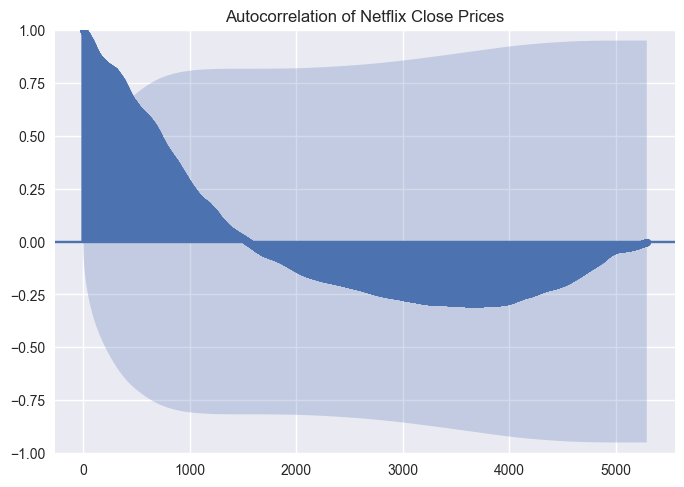

In [37]:
data_nflx.reset_index(inplace=True)
# Convert the Date column to a datetime type
data_nflx['Date'] = pd.to_datetime(data_nflx['Date'])

# Set the Date column as the index
data_nflx.set_index('Date', inplace=True)

# Plot the autocorrelation function (ACF) for 'Close' prices
plot_acf(data_nflx['Close'], lags=5293)

# Set the plot title
plt.title('Autocorrelation of Netflix Close Prices')

# Show the plot
plt.show()


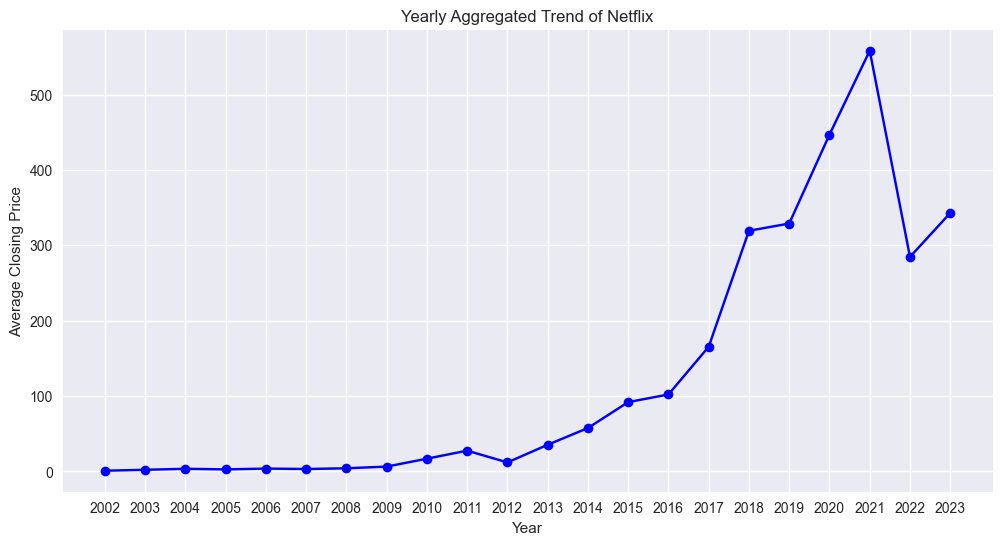

In [38]:
data_nflx.reset_index('Date', inplace=True)
# Convert the Date column to a datetime format
data_nflx['Date'] = pd.to_datetime(data_nflx['Date'])

# Group the data by year and calculate the aggregated values
yearly_data = data_nflx.groupby(data_nflx['Date'].dt.year).agg({'Open': 'mean', 'Close': 'mean', 'Volume': 'sum'})

# Plot the yearly aggregated trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data['Close'], marker='o', linestyle='-', color='blue')

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.title('Yearly Aggregated Trend of Netflix')

# Add labels for each year on the x-axis
plt.xticks(yearly_data.index)

# Show the plot
plt.show()


netflix growth on 2021 was due to pandemic. Growth in compititors like hotstar, prime videos and Hbo has resulted in loss during 2022. And Account sharing crackdown was one of the reason for rise again.

One can easily say from these that how strong sentimental analysis or textual analysis are in stock market

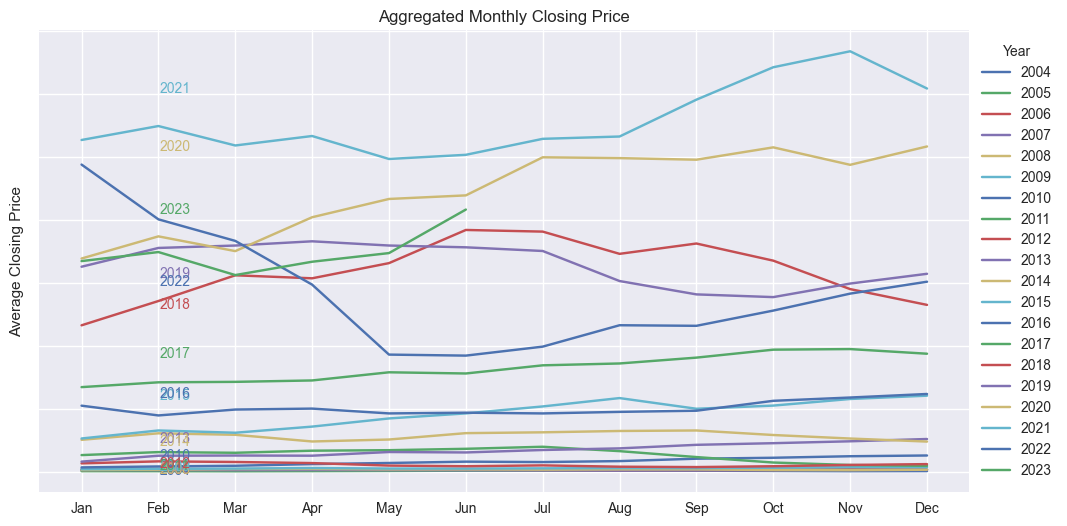

In [39]:

# Convert the Date column to a datetime format
data_nflx['Date'] = pd.to_datetime(data_nflx['Date'])

# Create a new DataFrame to store the filtered data
filtered_data = data_nflx[data_nflx['Date'] >= '2004-01-01'].copy()

# Group the data by year and month and calculate the aggregated values
monthly_data = filtered_data.groupby(pd.Grouper(key='Date', freq='M')).agg({'Open': 'mean', 'Close': 'mean', 'Volume': 'sum'})

# Get the year and month from the datetime index
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%b')

# Create a dictionary of colors for each year
colors = {year: f'C{i}' for i, year in enumerate(monthly_data['Year'].unique())}

# Create a line plot of the aggregated monthly data for each year
plt.figure(figsize=(12, 6))

for year, color in colors.items():
    year_data = monthly_data[monthly_data['Year'] == year]
    plt.plot(year_data['Month'], year_data['Close'], color=color, label=str(year))

# Set the y-axis label and title
plt.ylabel('Average Closing Price')
plt.title('Aggregated Monthly Closing Price')

# Add legend and customize its position
plt.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.5))

# Add custom labels for each year on the right side of the plot
ax = plt.gca()
ax.set_yticklabels([])
for year, color in colors.items():
    plt.text(1.01, monthly_data[monthly_data['Year'] == year]['Close'].iloc[-1], str(year), color=color, ha='left', va='center')

plt.grid(True)
plt.show()


Above code was just to demonstrate that there is no anykind of monthly trend in netflix stock price
On march 2023 netflix implimented Account sharing crackdown which was resulted in loss but we can see that this decision was actually helpfull for them to create revenue but one can not be sure that how long it would sustain

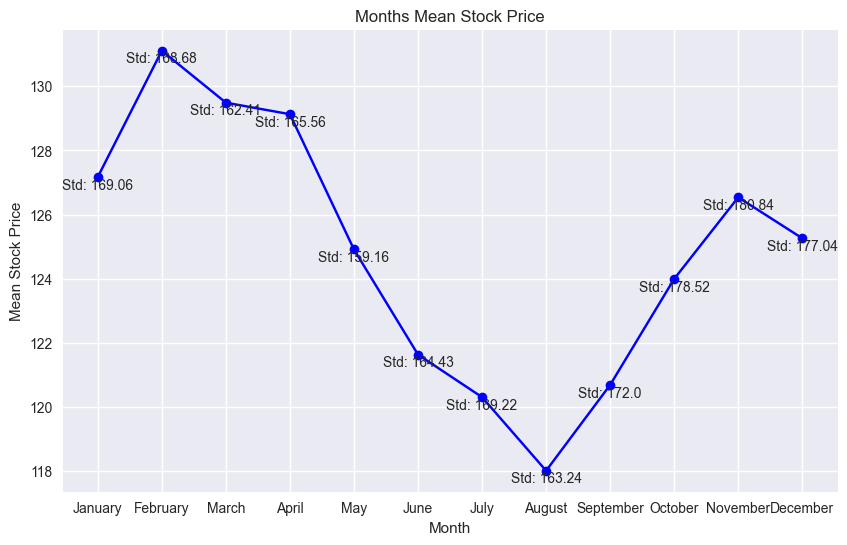

In [40]:
import calendar

data_nflx['Date'] = pd.to_datetime(data_nflx['Date'])
data_nflx.set_index('Date', inplace=True)

# Group the data by months and calculate the mean and standard deviation of the stock price for each month
months_mean = data_nflx.groupby(data_nflx.index.month)['Close'].mean()
months_std = data_nflx.groupby(data_nflx.index.month)['Close'].std()

# Reset the index of months_mean and months_std
months_mean = months_mean.reset_index()
months_std = months_std.reset_index()

# Define the month labels
months = [calendar.month_name[i] for i in range(1, 13)]

# Plot the months' mean stock price
plt.figure(figsize=(10, 6))
plt.plot(months_mean['Date'].apply(lambda x: months[x-1]), months_mean['Close'], marker='o', linestyle='-', color='blue')
plt.xlabel('Month')
plt.ylabel('Mean Stock Price')
plt.title('Months Mean Stock Price')

# Add text annotations for the standard deviation
for i, std in enumerate(months_std['Close']):
    plt.text(months_mean['Date'][i]-1, months_mean['Close'][i], f'\nStd: {np.round(std, 2)}', ha='center', va='center')

plt.grid(True)
plt.show()

data_nflx.reset_index('Date', inplace=True)

- 18-24 years old: 24%
- 25-34 years old: 28%
- 35-44 years old: 22%
- 45-54 years old: 17%
- 55-64 years old: 8%
- 65 years old and above: 1%

this is the age distibution of netflix user according to bard. It is showing that young people are using it more. There can be 2 resons behind great loss during June.
1. Familes are busy in holidays so don't need virtual entertainment
2. There is high work load during june and maybe less income with people to invest in entertainment platform like netflix

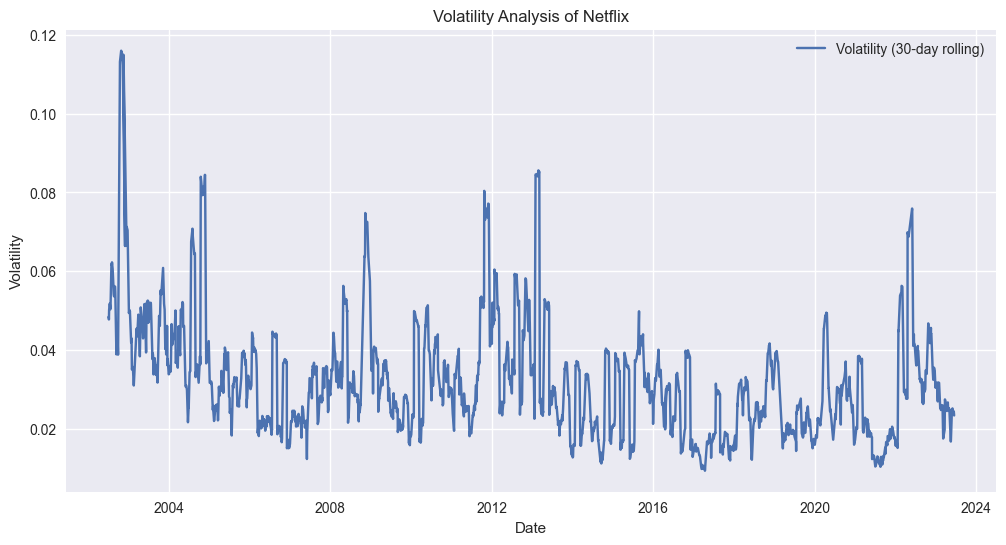

In [41]:
# Calculate daily returns
data_nflx['Returns'] = data_nflx['Close'].pct_change()

# Calculate the standard deviation of daily returns (volatility)
volatility = np.std(data_nflx['Returns'])

# Plot the volatility
plt.figure(figsize=(12, 6))
plt.plot(data_nflx['Date'], data_nflx['Returns'].rolling(window=30).std(), label='Volatility (30-day rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Analysis of Netflix')
plt.legend()
plt.grid(True)
plt.show()

The following above data shows that there is lesser risk assosiated with netflix and on recent days the volatily is less compare to expected risk

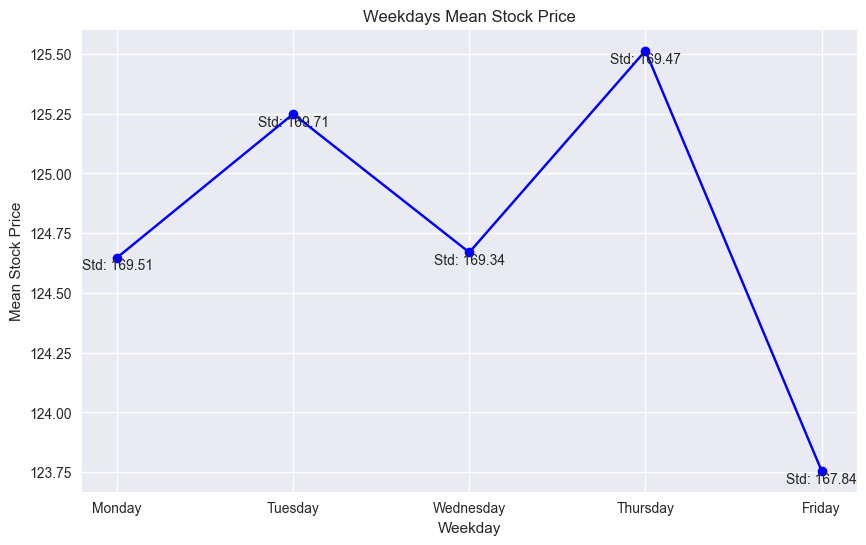

In [42]:
data_nflx['Date'] = pd.to_datetime(data_nflx['Date'])
data_nflx.set_index('Date', inplace=True)

# Group the data by weekdays and calculate the mean and standard deviation of the stock price for each weekday
weekdays_mean = data_nflx.groupby(data_nflx.index.weekday)['Close'].mean()
weekdays_std = data_nflx.groupby(data_nflx.index.weekday)['Close'].std()

# Define the weekdays labels
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Plot the weekdays' mean stock price
plt.figure(figsize=(10, 6))
plt.plot(weekdays, weekdays_mean, marker='o', linestyle='-', color='blue')
plt.xlabel('Weekday')
plt.ylabel('Mean Stock Price')
plt.title('Weekdays Mean Stock Price')

# Add text annotations for the standard deviation
for i, std in enumerate(weekdays_std):
    plt.text(weekdays[i], weekdays_mean[i], f'\nStd: {np.round(std, 2)}', ha='center', va='center')

plt.grid(True)
plt.show()

data_nflx.reset_index('Date', inplace=True)

There is not much deviation in mean price in case of weekdays

- Price: ```$400.47 per share```
- Market capitalization: ```$193.8 billion```
- P/E ratio: ```20.6```
- Dividend yield: ```0%  ```
- Revenue: ```$29.7 billion (2022)```
- Net income: ```$5.7 billion (2022)```
- Free cash flow: ```$15.2 billion (2022)```


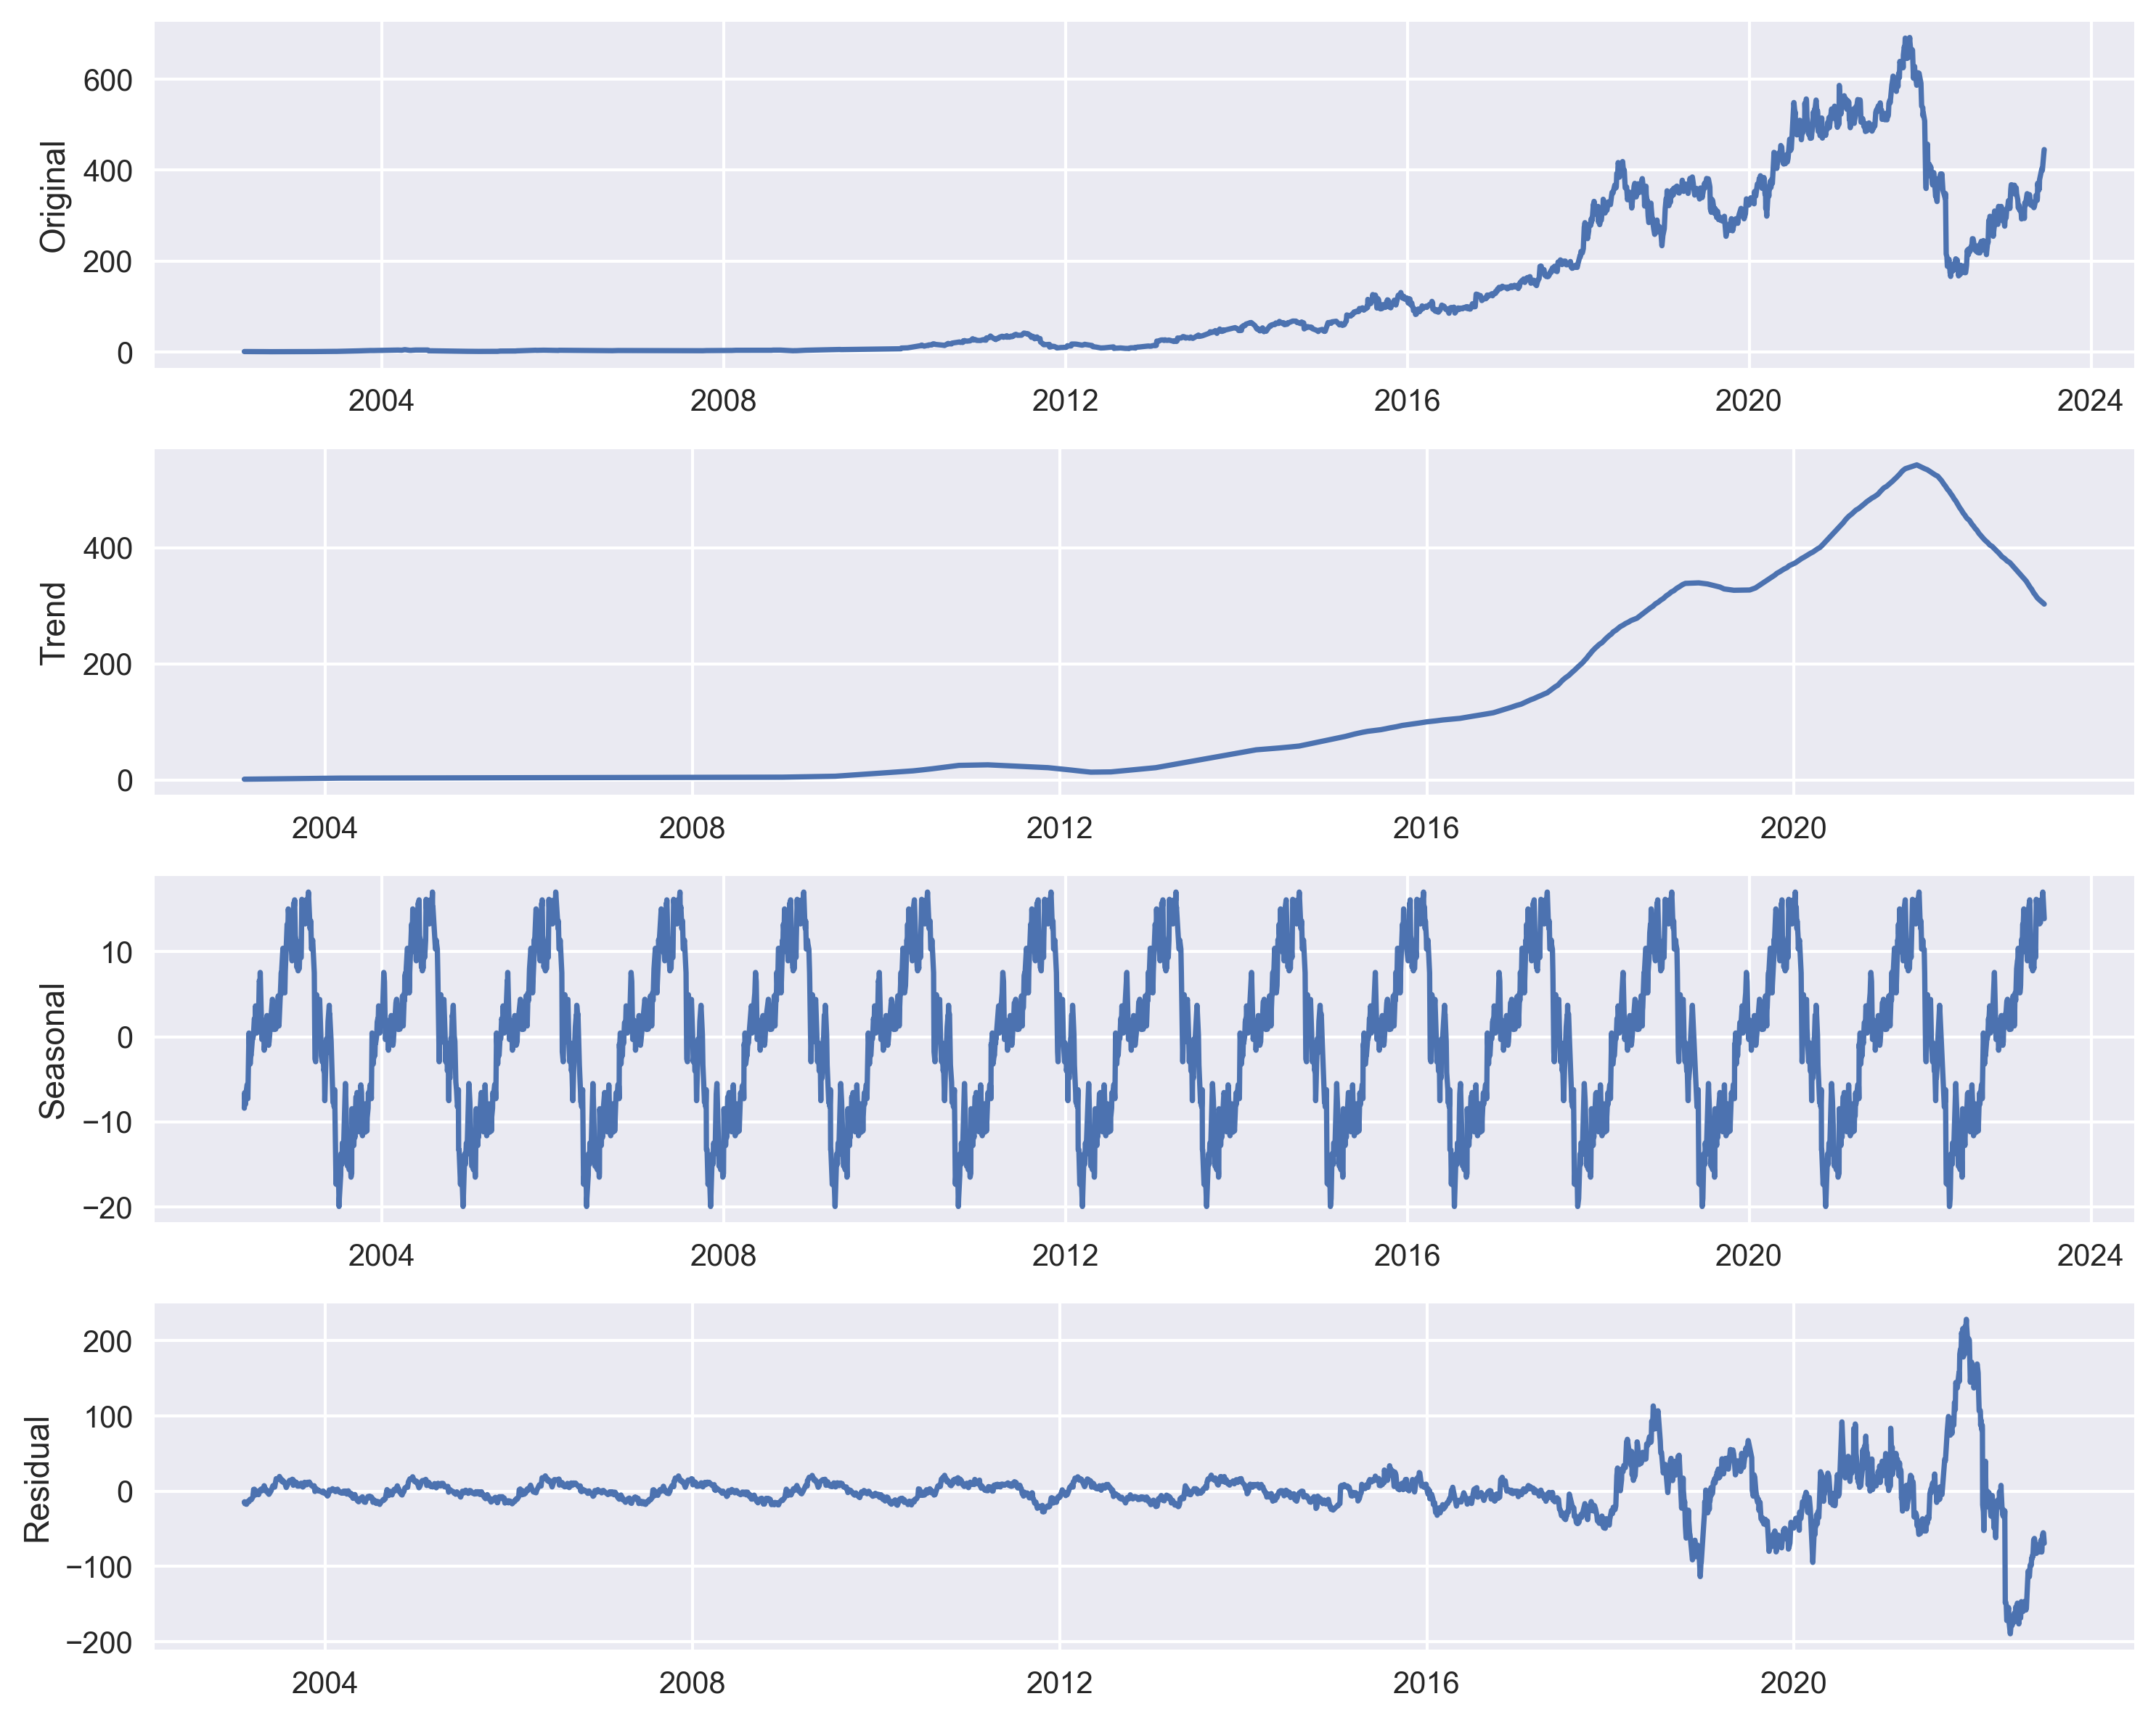

In [43]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt



# Convert 'Date' column to datetime
data_nflx['Date'] = pd.to_datetime(data_nflx['Date'])

# Set 'Date' as the index
data_nflx.set_index('Date', inplace=True)

# Perform seasonal decomposition
result = sm.tsa.seasonal_decompose(data_nflx['Close'], model='additive', period=365)

# Access the components of the decomposition
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Set the figure size and DPI
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8), dpi=300)

# Plot the components
axes[0].plot(data_nflx.index, data_nflx['Close'])
axes[0].set_ylabel('Original')
axes[1].plot(data_nflx.index, trend)
axes[1].set_ylabel('Trend')
axes[2].plot(data_nflx.index, seasonal)
axes[2].set_ylabel('Seasonal')
axes[3].plot(data_nflx.index, residual)
axes[3].set_ylabel('Residual')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [44]:
data_nflx.reset_index(inplace=True)
data_nflx

Date  index        Open        High         Low  \
0    2002-05-23 00:00:00-04:00      0    1.156429    1.242857    1.145714   
1    2002-05-24 00:00:00-04:00      1    1.214286    1.225000    1.197143   
2    2002-05-28 00:00:00-04:00      2    1.213571    1.232143    1.157143   
3    2002-05-29 00:00:00-04:00      3    1.164286    1.164286    1.085714   
4    2002-05-30 00:00:00-04:00      4    1.107857    1.107857    1.071429   
...                        ...    ...         ...         ...         ...   
5298 2023-06-09 00:00:00-04:00   5298  424.500000  425.899994  414.760010   
5299 2023-06-12 00:00:00-04:00   5299  418.829987  424.700012  416.570007   
5300 2023-06-13 00:00:00-04:00   5300  430.010010  437.269989  428.399994   
5301 2023-06-14 00:00:00-04:00   5301  434.989990  447.329987  433.500000   
5302 2023-06-15 00:00:00-04:00   5302  444.100006  448.649994  439.500000   

           Close     Volume  Dividends  Stock Splits  Adjusted Close   Returns  
0       1.196429  104790000        0.0           1.0        1.196429       NaN  
1       1.210000   11104800        0.0           1.0        1.210000  0.011343  
2       1.157143    6609400        0.0           1.0        1.157143 -0.043684  
3       1.103571    6757800        0.0           1.0        1.103571 -0.046297  
4       1.071429   10154200        0.0           1.0        1.071429 -0.029125  
...          ...        ...        ...           ...             ...       ...  
5298  420.019989   12363000        0.0           1.0      420.019989  0.026016  
5299  423.970001    5959500        0.0           1.0      423.970001  0.009404  
5300  435.730011    7820500        0.0           1.0      435.730011  0.027738  
5301  440.859985    8413100        0.0           1.0      440.859985  0.011773  
5302  445.269989    7093000        0.0           1.0      445.269989  0.010003  

[5303 rows x 11 columns]

In [45]:
data_nflx = data_nflx.drop(columns='index')
data_nflx

Date        Open        High         Low  \
0    2002-05-23 00:00:00-04:00    1.156429    1.242857    1.145714   
1    2002-05-24 00:00:00-04:00    1.214286    1.225000    1.197143   
2    2002-05-28 00:00:00-04:00    1.213571    1.232143    1.157143   
3    2002-05-29 00:00:00-04:00    1.164286    1.164286    1.085714   
4    2002-05-30 00:00:00-04:00    1.107857    1.107857    1.071429   
...                        ...         ...         ...         ...   
5298 2023-06-09 00:00:00-04:00  424.500000  425.899994  414.760010   
5299 2023-06-12 00:00:00-04:00  418.829987  424.700012  416.570007   
5300 2023-06-13 00:00:00-04:00  430.010010  437.269989  428.399994   
5301 2023-06-14 00:00:00-04:00  434.989990  447.329987  433.500000   
5302 2023-06-15 00:00:00-04:00  444.100006  448.649994  439.500000   

           Close     Volume  Dividends  Stock Splits  Adjusted Close   Returns  
0       1.196429  104790000        0.0           1.0        1.196429       NaN  
1       1.210000   11104800        0.0           1.0        1.210000  0.011343  
2       1.157143    6609400        0.0           1.0        1.157143 -0.043684  
3       1.103571    6757800        0.0           1.0        1.103571 -0.046297  
4       1.071429   10154200        0.0           1.0        1.071429 -0.029125  
...          ...        ...        ...           ...             ...       ...  
5298  420.019989   12363000        0.0           1.0      420.019989  0.026016  
5299  423.970001    5959500        0.0           1.0      423.970001  0.009404  
5300  435.730011    7820500        0.0           1.0      435.730011  0.027738  
5301  440.859985    8413100        0.0           1.0      440.859985  0.011773  
5302  445.269989    7093000        0.0           1.0      445.269989  0.010003  

[5303 rows x 10 columns]

#### Spliting Numerical Data into training and testing models


In [46]:
from sklearn.model_selection import train_test_split

# Split the data into features (x) and target variable (y)
x = data_nflx.drop(columns=['Close'])
y = data_nflx['Close']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)


Training set shape: (4242, 9) (4242,)
Testing set shape: (1061, 9) (1061,)


## Textual Analysis

In [47]:

from textblob import TextBlob



# Perform sentiment analysis on the headlines
sentiments = []
for headline in news_api_netfix_data['Headline_preprocessed']:
    blob = TextBlob(headline)
    sentiment=blob.sentiment.polarity
    if sentiment > 0:
        sentiments.append('Positive')
    elif sentiment < 0:
        sentiments.append('Negative')
    else:
        sentiments.append('Neutral')

# Add the sentiment column to the DataFrame
news_api_netfix_data['Sentiment'] = sentiments

# Save the updated DataFrame
news_api_netfix_data.to_csv('news_api_netfix_data_sentiment.csv', index=False)


In [48]:
news_api_netfix_data

Date                                           Headline  \
0    2023-05-23T18:51:33Z  Netflix starts charging for account sharing in...   
1    2023-05-23T10:45:54Z  Netflix makes it easier to find titles you've ...   
2    2023-05-22T18:16:14Z  Netflix is making it easier to find saved show...   
3    2023-05-06T13:30:27Z  Netflix is launching a remastered 'World of Go...   
4    2023-05-11T15:56:41Z  Netflix canceled its in-person upfront, probab...   
..                    ...                                                ...   
515  2023-06-02T22:48:17Z  Netflix investors voted against rich pay packa...   
516  2023-06-03T13:00:00Z  The 7 best movies new to streaming on Netflix,...   
517  2023-06-03T14:30:00Z  Disney Gets Big Write-Off After Pulling Its St...   
518  2023-06-02T22:25:37Z  Don’t Look Up director Adam McKay to triple do...   
519  2023-06-04T13:00:58Z  Un año después, Netflix tiene el mismo problem...   

                                 Headline_preprocessed Sentiment  
0                  netflix start charg account share u   Neutral  
1    netflix make easier find titl 've ad list n't ...   Neutral  
2    netflix make easier find save show movi still ...   Neutral  
3          netflix launch remast 'world goo ' may 23rd   Neutral  
4    netflix cancel in-person upfront , probabl avo...   Neutral  
..                                                 ...       ...  
515  netflix investor vote rich pay packag compani ...  Positive  
516  7 best movi new stream netflix , max , prime v...  Positive  
517          disney get big write-off pull stream show   Neutral  
518    ’ look director adam mckay tripl donat stop oil   Neutral  
519  un año despué , netflix tien el mismo problema...   Neutral  

[520 rows x 4 columns]

In [49]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def calculate_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Extract the compound sentiment score

# Apply the sentiment analysis function to the 'Headline' column
news_api_netfix_data['SentimentScore'] = news_api_netfix_data['Headline'].apply(calculate_sentiment_score)

# Display the updated DataFrame
news_api_netfix_data


Date                                           Headline  \
0    2023-05-23T18:51:33Z  Netflix starts charging for account sharing in...   
1    2023-05-23T10:45:54Z  Netflix makes it easier to find titles you've ...   
2    2023-05-22T18:16:14Z  Netflix is making it easier to find saved show...   
3    2023-05-06T13:30:27Z  Netflix is launching a remastered 'World of Go...   
4    2023-05-11T15:56:41Z  Netflix canceled its in-person upfront, probab...   
..                    ...                                                ...   
515  2023-06-02T22:48:17Z  Netflix investors voted against rich pay packa...   
516  2023-06-03T13:00:00Z  The 7 best movies new to streaming on Netflix,...   
517  2023-06-03T14:30:00Z  Disney Gets Big Write-Off After Pulling Its St...   
518  2023-06-02T22:25:37Z  Don’t Look Up director Adam McKay to triple do...   
519  2023-06-04T13:00:58Z  Un año después, Netflix tiene el mismo problem...   

                                 Headline_preprocessed Sentiment  \
0                  netflix start charg account share u   Neutral   
1    netflix make easier find titl 've ad list n't ...   Neutral   
2    netflix make easier find save show movi still ...   Neutral   
3          netflix launch remast 'world goo ' may 23rd   Neutral   
4    netflix cancel in-person upfront , probabl avo...   Neutral   
..                                                 ...       ...   
515  netflix investor vote rich pay packag compani ...  Positive   
516  7 best movi new stream netflix , max , prime v...  Positive   
517          disney get big write-off pull stream show   Neutral   
518    ’ look director adam mckay tripl donat stop oil   Neutral   
519  un año despué , netflix tien el mismo problema...   Neutral   

     SentimentScore  
0            0.4215  
1            0.2263  
2            0.6808  
3            0.0000  
4           -0.2960  
..              ...  
515          0.5423  
516          0.6369  
517          0.0000  
518         -0.2960  
519          0.0000  

[520 rows x 5 columns]

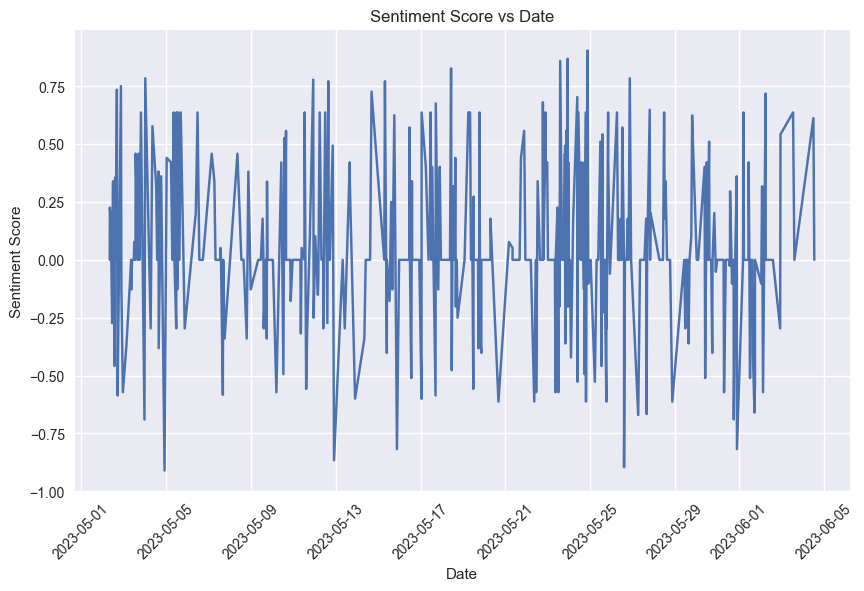

In [50]:
# Convert the 'Date' column to datetime format
news_api_netfix_data['Date'] = pd.to_datetime(news_api_netfix_data['Date'])

# Sort the dataframe by the 'Date' column
news_api_netfix_data = news_api_netfix_data.sort_values('Date')

# Plot sentimental score against date
plt.figure(figsize=(10, 6))
plt.plot(news_api_netfix_data['Date'], news_api_netfix_data['SentimentScore'])
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score vs Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

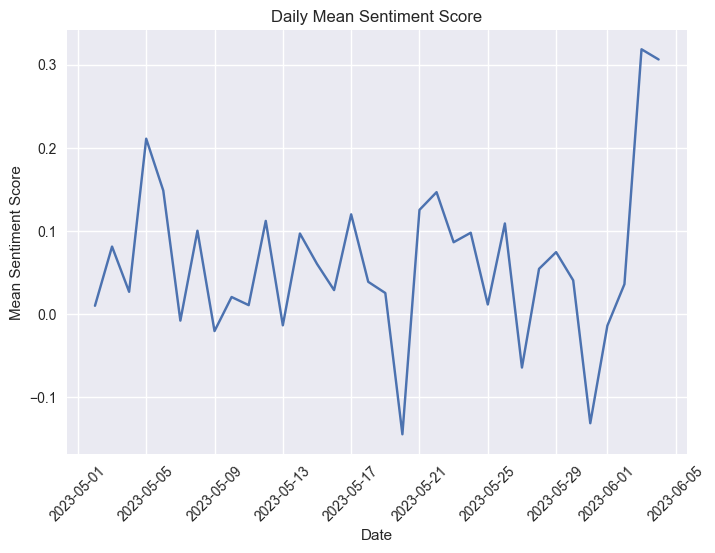

In [51]:
daily_sentiment_mean = news_api_netfix_data.groupby(news_api_netfix_data['Date'].dt.date)['SentimentScore'].mean()
daily_sentiment_mean = daily_sentiment_mean.sort_index(ascending=True)
import matplotlib.pyplot as plt

plt.plot(daily_sentiment_mean.index, daily_sentiment_mean.values)
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.title('Daily Mean Sentiment Score')
plt.xticks(rotation=45)
plt.show()


## Combining both the data

In [52]:
textual_data_IN_news = pd.read_csv('india-news-headlines_preprocessed_merged.csv')

In [53]:
textual_data_IN_news = textual_data_IN_news[['publish_date','headline_text_preprocessed']]

In [54]:
textual_data_IN_news

publish_date                         headline_text_preprocessed
0      2001-01-02  statu quo disturb ayodhya ; say vajpaye , fiss...
1      2001-01-03  powerless north india grope dark , think ; lax...
2      2001-01-04  string pull stephen hawk india , vajpaye give ...
3      2001-01-05  light combat craft take india club class , haw...
4      2001-01-06  light combat craft take india club class , haw...
...           ...                                                ...
7712   2022-03-27  play dead man bodi god meant sit refriger : gu...
7713   2022-03-28  fashion becom democrat ; demand stylist soar ,...
7714   2022-03-29  bobbi deol : like dad ; hope work age , yasha ...
7715   2022-03-30  give trend : dossmod , time gave boyfriend inc...
7716   2022-03-31  shashank goe back coastal karnataka moggina ma...

[7717 rows x 2 columns]

In [55]:
data_nflx['Date'] = pd.to_datetime(data_nflx['Date']).dt.date
textual_data_IN_news['publish_date'] = pd.to_datetime(textual_data_IN_news['publish_date']).dt.date
combined_data = pd.concat([data_nflx.set_index('Date'), textual_data_IN_news.set_index('publish_date')], axis=1, join='inner')

combined_data

Open        High         Low       Close     Volume  \
2002-05-23    1.156429    1.242857    1.145714    1.196429  104790000   
2002-05-24    1.214286    1.225000    1.197143    1.210000   11104800   
2002-05-28    1.213571    1.232143    1.157143    1.157143    6609400   
2002-05-29    1.164286    1.164286    1.085714    1.103571    6757800   
2002-05-30    1.107857    1.107857    1.071429    1.071429   10154200   
...                ...         ...         ...         ...        ...   
2022-03-25  377.070007  377.640015  366.429993  373.850006    3574500   
2022-03-28  375.230011  380.279999  366.730011  378.510010    4323400   
2022-03-29  384.390015  396.500000  380.329987  391.820007    5880700   
2022-03-30  389.549988  392.700012  378.630005  381.470001    4023300   
2022-03-31  383.589996  384.000000  373.609985  374.589996    4134700   

            Dividends  Stock Splits  Adjusted Close   Returns  \
2002-05-23        0.0           1.0        1.196429       NaN   
2002-05-24        0.0           1.0        1.210000  0.011343   
2002-05-28        0.0           1.0        1.157143 -0.043684   
2002-05-29        0.0           1.0        1.103571 -0.046297   
2002-05-30        0.0           1.0        1.071429 -0.029125   
...               ...           ...             ...       ...   
2022-03-25        0.0           1.0      373.850006 -0.004951   
2022-03-28        0.0           1.0      378.510010  0.012465   
2022-03-29        0.0           1.0      391.820007  0.035164   
2022-03-30        0.0           1.0      381.470001 -0.026415   
2022-03-31        0.0           1.0      374.589996 -0.018036   

                                   headline_text_preprocessed  
2002-05-23  pillay ; dhillon recal camp , snow dew readi t...  
2002-05-24  india ; u tie defenc shadow n-war , asambhav-r...  
2002-05-28  pseb engin nuclear plant , hostag releas ; dha...  
2002-05-29  rustic bow set glori , sweet smell stardom , i...  
2002-05-30  pressur rajind 's mantra , pressur ; say new h...  
...                                                       ...  
2022-03-25  speed ; shortcut tackl unruli custom : take de...  
2022-03-28  fashion becom democrat ; demand stylist soar ,...  
2022-03-29  bobbi deol : like dad ; hope work age , yasha ...  
2022-03-30  give trend : dossmod , time gave boyfriend inc...  
2022-03-31  shashank goe back coastal karnataka moggina ma...  

[5000 rows x 10 columns]

In [56]:
# combined_data['compound'] = ''
# combined_data['negative'] = ''
# combined_data['neutral'] = ''
# combined_data['positive'] = ''


# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import unicodedata

# #Sentiment Analyzer
# sid = SentimentIntensityAnalyzer()
# print('Start calculating sentiment scores:')

# combined_data['compound'] = combined_data['headline_text_preprocessed'].apply(lambda x: sid.polarity_scores(x)['compound'])
# print('Compound Done')
# combined_data['negative'] = combined_data['headline_text_preprocessed'].apply(lambda x: sid.polarity_scores(x)['neg'])
# print('Negative Done')
# combined_data['neutral'] = combined_data['headline_text_preprocessed'].apply(lambda x: sid.polarity_scores(x)['neu'])
# print('Neutral Done')
# combined_data['positive'] = combined_data['headline_text_preprocessed'].apply(lambda x: sid.polarity_scores(x)['pos'])
# print('Positive Done')
# print('Stop')

# combined_data.head()

# combined_data=combined_data.drop(columns='headline_text_preprocessed')
# combined_data=combined_data.drop(columns=['Close' , 'Returns'])
# combined_data.to_csv('final_data_combined_v01.csv')

In [57]:
final_data_combined_v01 = pd.read_csv('final_data_combined_v01.csv')

In [58]:
final_data_combined_v01.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

final_data_combined_v01


Date        Open        High         Low     Volume  Dividends  \
0     2002-05-23    1.156429    1.242857    1.145714  104790000        0.0   
1     2002-05-24    1.214286    1.225000    1.197143   11104800        0.0   
2     2002-05-28    1.213571    1.232143    1.157143    6609400        0.0   
3     2002-05-29    1.164286    1.164286    1.085714    6757800        0.0   
4     2002-05-30    1.107857    1.107857    1.071429   10154200        0.0   
...          ...         ...         ...         ...        ...        ...   
4995  2022-03-25  377.070007  377.640015  366.429993    3574500        0.0   
4996  2022-03-28  375.230011  380.279999  366.730011    4323400        0.0   
4997  2022-03-29  384.390015  396.500000  380.329987    5880700        0.0   
4998  2022-03-30  389.549988  392.700012  378.630005    4023300        0.0   
4999  2022-03-31  383.589996  384.000000  373.609985    4134700        0.0   

      Stock Splits  Adjusted Close  compound  negative  neutral  positive  
0              1.0        1.196429   -0.9994     0.167    0.742     0.091  
1              1.0        1.210000   -0.9992     0.162    0.744     0.094  
2              1.0        1.157143   -0.9990     0.158    0.757     0.085  
3              1.0        1.103571   -0.9987     0.144    0.770     0.086  
4              1.0        1.071429   -0.9993     0.164    0.743     0.093  
...            ...             ...       ...       ...      ...       ...  
4995           1.0      373.850006   -0.9999     0.140    0.803     0.057  
4996           1.0      378.510010   -0.9998     0.139    0.786     0.074  
4997           1.0      391.820007   -0.9996     0.120    0.810     0.069  
4998           1.0      381.470001   -0.9998     0.133    0.803     0.064  
4999           1.0      374.589996   -0.9998     0.125    0.818     0.057  

[5000 rows x 12 columns]

In [59]:
final_data_combined_v01['Dividends'].unique()

array([0.])

As divident is zero everywhere better to avoid it

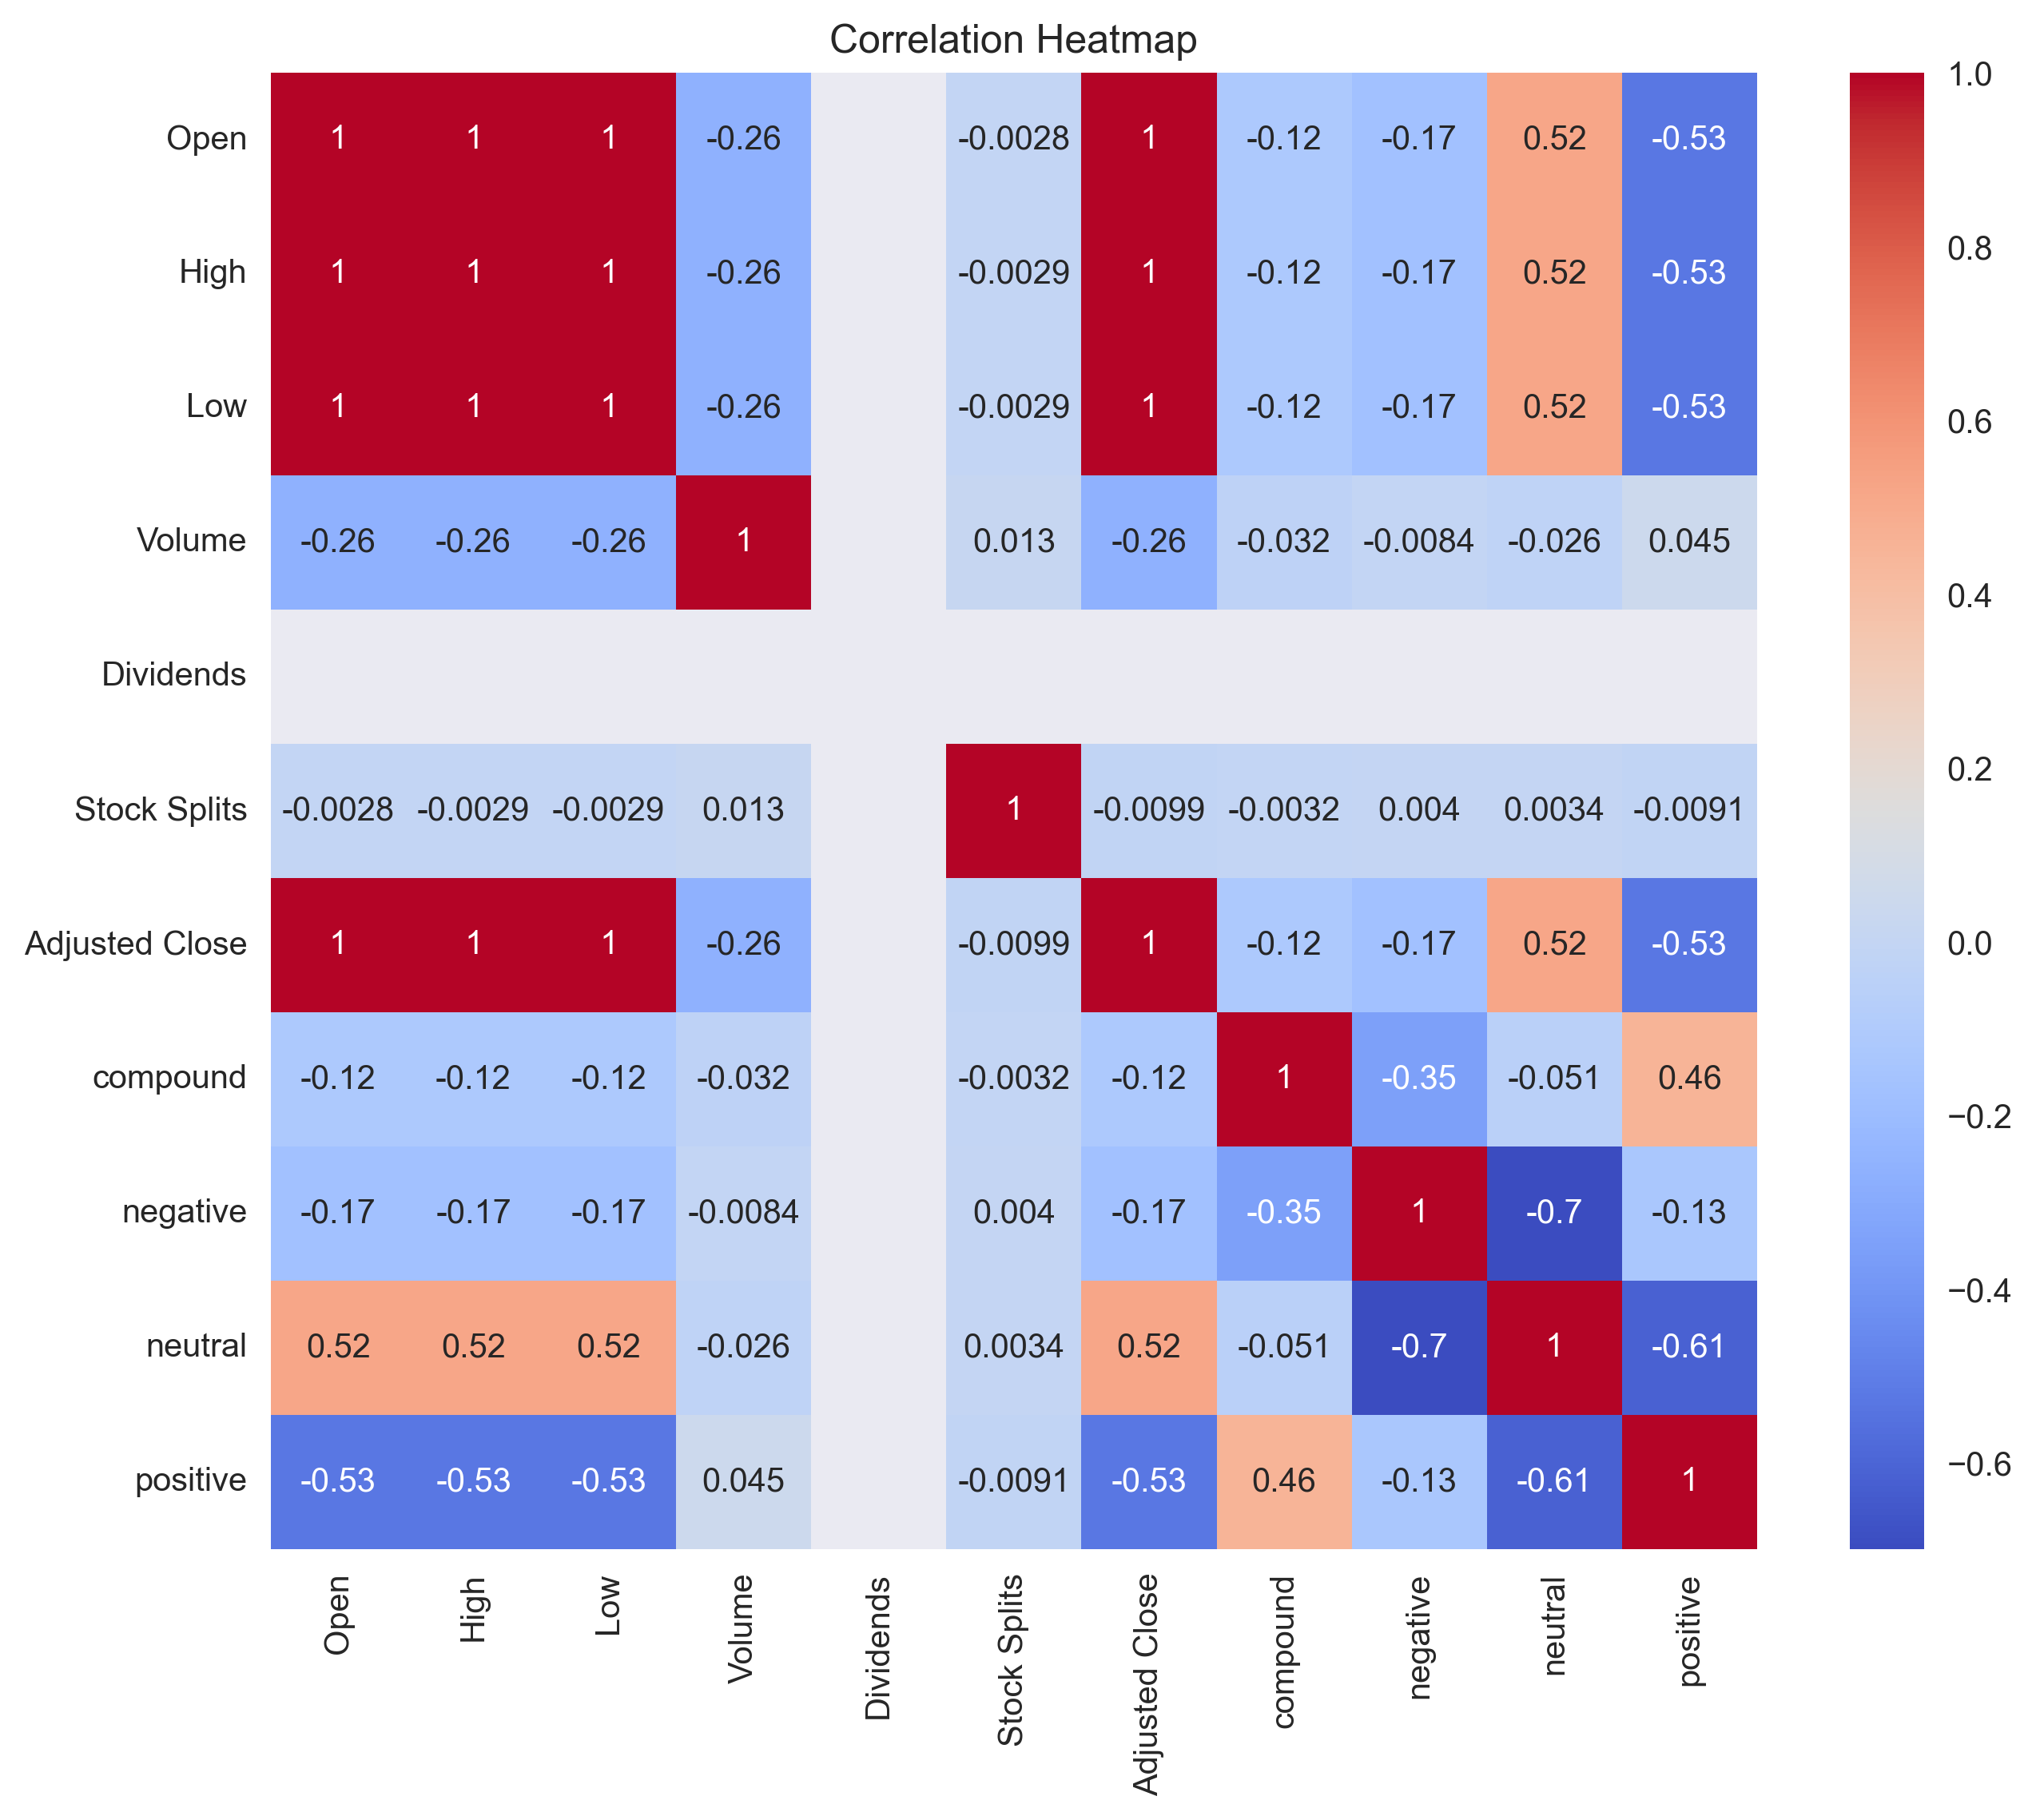

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = final_data_combined_v01.corr()

# Create a heatmap
plt.figure(figsize=(10, 8),dpi=300)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [61]:
final_data_combined_v01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5000 non-null   object 
 1   Open            5000 non-null   float64
 2   High            5000 non-null   float64
 3   Low             5000 non-null   float64
 4   Volume          5000 non-null   int64  
 5   Dividends       5000 non-null   float64
 6   Stock Splits    5000 non-null   float64
 7   Adjusted Close  5000 non-null   float64
 8   compound        5000 non-null   float64
 9   negative        5000 non-null   float64
 10  neutral         5000 non-null   float64
 11  positive        5000 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 468.9+ KB


## Spliting the DataSet
we are spliting them which whould be suitable for Time-related data such as this

In [62]:
final_data_combined_v01.set_index('Date', inplace=True)

from sklearn.model_selection import train_test_split

# Separate target variable (Adjusted Close) and features
target = final_data_combined_v01['Adjusted Close']
features = final_data_combined_v01.drop(['Adjusted Close'], axis=1)

# Split the data into train and test sets
train_size = int(len(final_data_combined_v01) * 0.8)  # 80% of data for training
train_target = target[:train_size]
train_features = features[:train_size]
test_target = target[train_size:]
test_features = features[train_size:]

# Print the shapes of train and test sets
print("Train data shape:", train_features.shape)
print("Test data shape:", test_features.shape)
final_data_combined_v01.reset_index('Date', inplace=True)


Train data shape: (4000, 10)
Test data shape: (1000, 10)


In [63]:
train_features

Open        High         Low     Volume  Dividends  \
Date                                                                   
2002-05-23    1.156429    1.242857    1.145714  104790000        0.0   
2002-05-24    1.214286    1.225000    1.197143   11104800        0.0   
2002-05-28    1.213571    1.232143    1.157143    6609400        0.0   
2002-05-29    1.164286    1.164286    1.085714    6757800        0.0   
2002-05-30    1.107857    1.107857    1.071429   10154200        0.0   
...                ...         ...         ...        ...        ...   
2018-04-06  289.100006  298.850006  285.649994   11444800        0.0   
2018-04-09  291.769989  299.549988  289.119995    9853600        0.0   
2018-04-10  297.679993  298.950012  291.690002   10660500        0.0   
2018-04-11  302.880005  311.640015  301.820007   14877400        0.0   
2018-04-12  309.720001  311.130005  306.750000   10249400        0.0   

            Stock Splits  compound  negative  neutral  positive  
Date                                                             
2002-05-23           1.0   -0.9994     0.167    0.742     0.091  
2002-05-24           1.0   -0.9992     0.162    0.744     0.094  
2002-05-28           1.0   -0.9990     0.158    0.757     0.085  
2002-05-29           1.0   -0.9987     0.144    0.770     0.086  
2002-05-30           1.0   -0.9993     0.164    0.743     0.093  
...                  ...       ...       ...      ...       ...  
2018-04-06           1.0   -0.9999     0.142    0.779     0.079  
2018-04-09           1.0   -0.9999     0.149    0.770     0.081  
2018-04-10           1.0   -0.9999     0.159    0.766     0.075  
2018-04-11           1.0   -0.9999     0.149    0.769     0.082  
2018-04-12           1.0   -0.9998     0.141    0.791     0.067  

[4000 rows x 10 columns]

In [64]:
train_target

Date
2002-05-23      1.196429
2002-05-24      1.210000
2002-05-28      1.157143
2002-05-29      1.103571
2002-05-30      1.071429
                 ...    
2018-04-06    288.850006
2018-04-09    289.929993
2018-04-10    298.070007
2018-04-11    303.670013
2018-04-12    309.250000
Name: Adjusted Close, Length: 4000, dtype: float64

In [65]:
test_features

Open        High         Low    Volume  Dividends  \
Date                                                                  
2018-04-13  317.290009  317.489990  308.230011  12046600        0.0   
2018-04-16  315.989990  316.100006  304.000000  20307900        0.0   
2018-04-17  329.660004  338.619995  323.769989  33866500        0.0   
2018-04-18  336.299988  338.820007  331.100006  11221100        0.0   
2018-04-19  332.880005  335.309998  326.769989   8438800        0.0   
...                ...         ...         ...       ...        ...   
2022-03-25  377.070007  377.640015  366.429993   3574500        0.0   
2022-03-28  375.230011  380.279999  366.730011   4323400        0.0   
2022-03-29  384.390015  396.500000  380.329987   5880700        0.0   
2022-03-30  389.549988  392.700012  378.630005   4023300        0.0   
2022-03-31  383.589996  384.000000  373.609985   4134700        0.0   

            Stock Splits  compound  negative  neutral  positive  
Date                                                             
2018-04-13           1.0   -0.9999     0.158    0.766     0.077  
2018-04-16           1.0   -0.9999     0.151    0.759     0.089  
2018-04-17           1.0   -0.9999     0.149    0.765     0.086  
2018-04-18           1.0   -0.9999     0.162    0.775     0.062  
2018-04-19           1.0   -0.9999     0.161    0.770     0.070  
...                  ...       ...       ...      ...       ...  
2022-03-25           1.0   -0.9999     0.140    0.803     0.057  
2022-03-28           1.0   -0.9998     0.139    0.786     0.074  
2022-03-29           1.0   -0.9996     0.120    0.810     0.069  
2022-03-30           1.0   -0.9998     0.133    0.803     0.064  
2022-03-31           1.0   -0.9998     0.125    0.818     0.057  

[1000 rows x 10 columns]

In [66]:
target

Date
2002-05-23      1.196429
2002-05-24      1.210000
2002-05-28      1.157143
2002-05-29      1.103571
2002-05-30      1.071429
                 ...    
2022-03-25    373.850006
2022-03-28    378.510010
2022-03-29    391.820007
2022-03-30    381.470001
2022-03-31    374.589996
Name: Adjusted Close, Length: 5000, dtype: float64

## Model Training

### Univariate Modeling

#### ARIMA

In [67]:
from statsmodels.tsa.arima.model import ARIMA
from sktime.performance_metrics.forecasting import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sktime.forecasting.model_selection import temporal_train_test_split

# Split the data into training and testing sets
train_data, test_data = temporal_train_test_split(data_all, test_size=0.2)

# Create the ARIMA model and fit it to the training data
model = ARIMA(train_data['Close'], order=(2, 6, 3))
model_fit = model.fit()

# Generate forecasts for the test data
forecasts = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data['Close'], forecasts)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(test_data['Close'], forecasts, squared=False)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test_data['Close'], forecasts)

# Print the values
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 1032100011.3951349
Root Mean Squared Error (RMSE): 3.1312118526560067e+18
Mean Absolute Percentage Error (MAPE): 3352031.395415026


It's a flop method. And model is taking almost infinite amount of time to process

#### Exponential Smoothing (ETS)

In [68]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.performance_metrics.forecasting import mean_absolute_error
from sktime.forecasting.model_selection import temporal_train_test_split

# Convert 'train_target' to a pandas Series with a proper index
# Split the data into training and testing sets
train_data, test_data = temporal_train_test_split(data_all, test_size=0.2)

# Create the ExponentialSmoothing model and fit it to the training data
model = ExponentialSmoothing(trend='Add', seasonal="Mul", sp=650)
model.fit(train_data['Close'])

fh = list(range(1, len(test_data) + 1))  # Forecast horizon from 1 to the length of test_data
forecasts = model.predict(fh=fh)


# mae = mean_absolute_error(test_data['Close'], forecasts)
# print("Mean Absolute Error:", mae)

from sktime.performance_metrics.forecasting import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data['Close'], forecasts)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(test_data['Close'], forecasts, squared=False)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test_data['Close'], forecasts)



# Print the values
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)



Mean Absolute Error (MAE): 118.37269550630384
Root Mean Squared Error (RMSE): 21182.863302166203
Mean Absolute Percentage Error (MAPE): 0.2891266760037174


D:\softwares\Anaconda_datascience\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [69]:
test_data['focasting']=forecasts

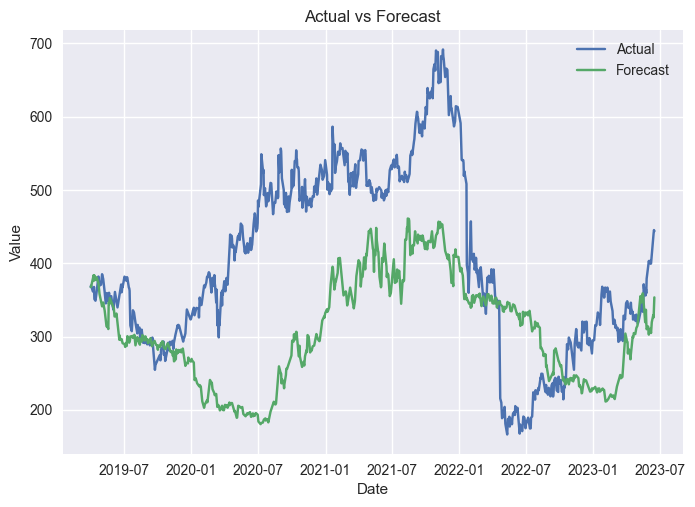

In [70]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(test_data['Date'], test_data['Close'], label='Actual')

# Plot the forecasting values
plt.plot(test_data['Date'], forecasts, label='Forecast')

# Set the labels and title of the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecast')

# Display the legend
plt.legend()

# Show the plot
plt.show()


##### Let's Find out Best value for seasonality

In [71]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.performance_metrics.forecasting import mean_absolute_error

def calculate_mae_with_seasonality(seasonality):
    # Create the ExponentialSmoothing model and fit it to the training data
    model = ExponentialSmoothing(trend='add', seasonal='mul', sp=seasonality)
    model.fit(train_data['Close'])

    fh = list(range(1, len(test_data) + 1))  # Forecast horizon from 1 to the length of test_data
    forecasts = model.predict(fh=fh)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(test_data['Close'], forecasts)

    return mae


seasonality = 200  # Your desired seasonality value

mae = calculate_mae_with_seasonality(seasonality)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 128.885617558893


D:\softwares\Anaconda_datascience\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [72]:
# seasonal = [i for i in range(2, 1300, 100)]
# error = []


# for seasonality in seasonal:

#     error.append(calculate_mae_with_seasonality(seasonality))

# print("Seasonal Values:", seasonal)
# print("MAE Errors:", error)


# # I have used Pickel to save error data as its takes lots of time you can uncomment that to use according to you
# import pickle


# with open('data.pickle', 'wb') as file:
#     pickle.dump((seasonal, error), file)


In [73]:






# # Plot the seasonal values
# plt.figure(figsize=(10, 6))
# plt.plot(seasonal, error)
# plt.xlabel('Seasonality')
# plt.ylabel('Mean Absolute Error')
# plt.title('Mean Absolute Error vs. Seasonality')
# plt.show()


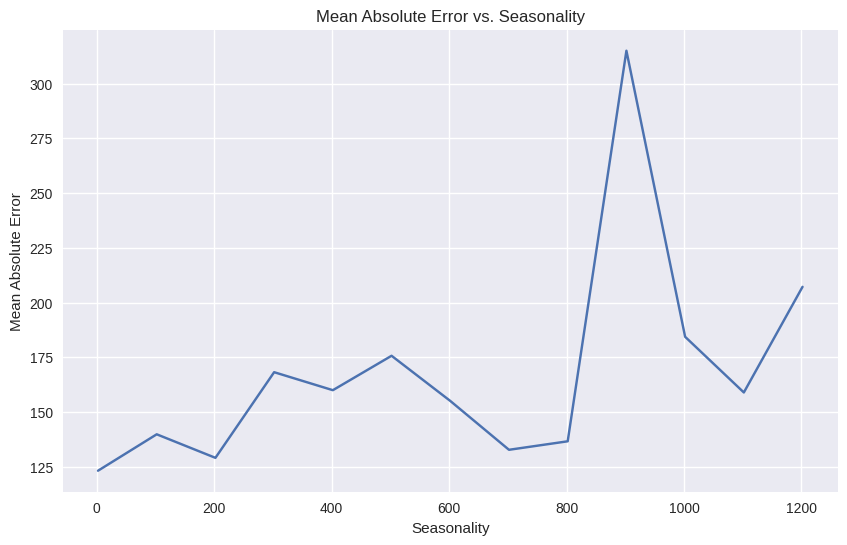

Finding correct value of seasonality could take lots of time. But following code suggest values between 600-800 could be an optimum value in this case

### Multivariate Model

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

final_data_combined_v01.set_index('Date', inplace=True)



# Split the data into features (x) and target variable (y)
x = final_data_combined_v01.drop(columns=['Adjusted Close'])
y = final_data_combined_v01['Adjusted Close']

x_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

final_data_combined_v01.reset_index('Date', inplace=True)



Training set shape: (4000, 10) (4000,)
Testing set shape: (1000, 10) (1000,)


In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [76]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler


In [77]:

# Sort the DataFrame by date in ascending order
data_all = data_all.sort_values('Date')

# Extract the 'Close' prices
data = data_all[['Adj Close']].values.astype(float)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data)

# Convert the data to PyTorch tensors
data_tensor = torch.FloatTensor(scaled_data).view(-1)


In [78]:
# Define the sequence length and split ratio
sequence_length = 10
split_ratio = 0.8

# Split the data into training and testing sets
train_size = int(len(data_tensor) * split_ratio)
train_data = data_tensor[:train_size]
test_data = data_tensor[train_size:]


In [79]:
# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append((seq, target))
    return sequences

# Create sequences for training and testing
train_sequences = create_sequences(train_data, sequence_length)
test_sequences = create_sequences(test_data, sequence_length)


In [80]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq.view(len(input_seq), 1, -1))
        predictions = self.fc(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

# Define the model parameters
input_size = 1
hidden_size = 32
output_size = 1

# Create an instance of the LSTM model
model = LSTMModel(input_size, hidden_size, output_size)


In [81]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [82]:
# Function to train the model
def train_model(model, train_sequences, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for seq, target in train_sequences:
            optimizer.zero_grad()
            output = model(seq)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

# Set the number of epochs and train the model
num_epochs = 100
train_model(model, train_sequences, num_epochs)


In [83]:
# Function to evaluate the model
def evaluate_model(model, test_sequences):
    model.eval()
    predictions = []
    with torch.no_grad():
        for seq, target in test_sequences:
            output = model(seq)
            predictions.append(output.item())
    return predictions

# Evaluate the model on the test data
test_predictions = evaluate_model(model, test_sequences)

# Denormalize the predictions
predicted_prices = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))


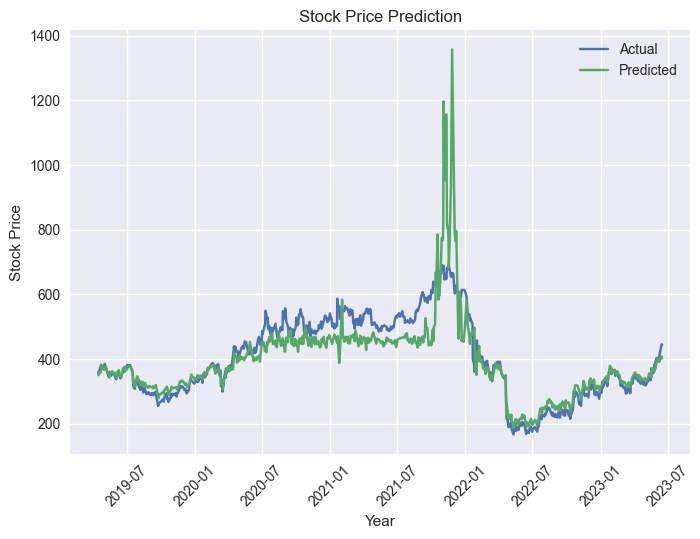

In [84]:
import matplotlib.pyplot as plt

test_dates = data_all['Date'].values[train_size + sequence_length:]

# Reshape the test_data array
test_data_reshaped = test_data[sequence_length:].reshape(-1, 1)

# Inverse transform the reshaped test_data
actual_prices = scaler.inverse_transform(test_data_reshaped)
# Convert the test_dates to the desired format (year or month)
test_dates_dt = pd.to_datetime(test_dates)



# Plot the actual and predicted stock prices
plt.plot(test_dates_dt, actual_prices, label='Actual')
plt.plot(test_dates_dt, predicted_prices, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.xticks(rotation=45)
plt.show()



Epoch 1/10
132/132 [==============================] - 12s 35ms/step - loss: 0.0012
Epoch 2/10
132/132 [==============================] - 5s 37ms/step - loss: 1.0229e-04
Epoch 3/10
132/132 [==============================] - 5s 37ms/step - loss: 1.0409e-04
Epoch 4/10
132/132 [==============================] - 5s 37ms/step - loss: 8.5495e-05
Epoch 5/10
132/132 [==============================] - 5s 36ms/step - loss: 9.6678e-05
Epoch 6/10
132/132 [==============================] - 5s 37ms/step - loss: 7.6205e-05
Epoch 7/10
132/132 [==============================] - 5s 37ms/step - loss: 8.3634e-05
Epoch 8/10
132/132 [==============================] - 5s 37ms/step - loss: 6.9480e-05
Epoch 9/10
132/132 [==============================] - 5s 37ms/step - loss: 6.7361e-05
Epoch 10/10
33/33 [==============================] - 2s 13ms/step


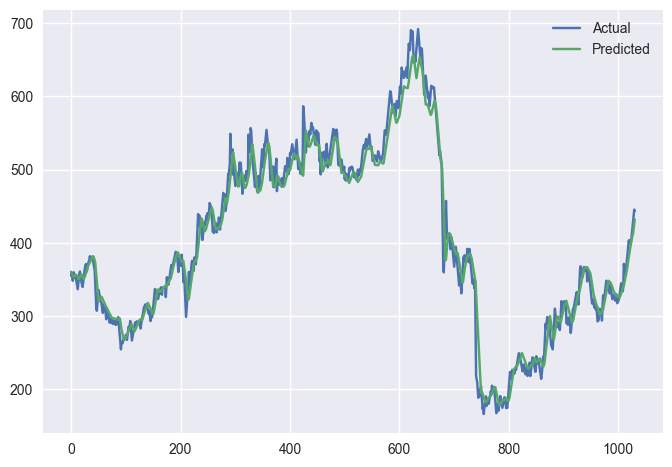

In [85]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Import the necessary libraries

# Step 2: Load the dataset


# Step 3: Preprocess the data
data = data_all['Adj Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data.reshape(-1, 1))

# Step 4: Split the data into training and testing sets
train_size = int(len(normalized_data) * 0.8)
train_data = normalized_data[:train_size]
test_data = normalized_data[train_size:]

# Step 5: Create the input sequences and labels for training
sequence_length = 30

def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Step 6: Build and train the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 7: Make predictions on the test data
predictions = model.predict(X_test)

# Step 8: Inverse normalize the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 9: Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Step 10: Visualize the predictions
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


Here is we can see this code has just used previous value and plotted the results. Not according to desire results

Epoch 1/10
132/132 [==============================] - 11s 37ms/step - loss: 9.6966e-04
Epoch 2/10
132/132 [==============================] - 5s 37ms/step - loss: 1.0872e-04
Epoch 3/10
132/132 [==============================] - 5s 37ms/step - loss: 1.0019e-04
Epoch 4/10
132/132 [==============================] - 5s 35ms/step - loss: 8.6949e-05
Epoch 5/10
132/132 [==============================] - 4s 34ms/step - loss: 8.2441e-05
Epoch 6/10
132/132 [==============================] - 4s 33ms/step - loss: 7.3050e-05
Epoch 7/10
132/132 [==============================] - 5s 35ms/step - loss: 9.3591e-05
Epoch 8/10
132/132 [==============================] - 5s 34ms/step - loss: 8.0560e-05
Epoch 9/10
132/132 [==============================] - 5s 34ms/step - loss: 6.4888e-05
Epoch 10/10
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 41ms/step


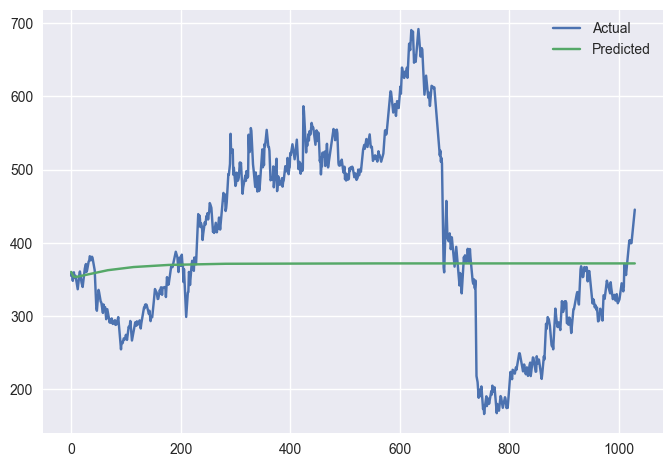

In [86]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Import the necessary libraries

# Step 3: Preprocess the data
data = data_all['Adj Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data.reshape(-1, 1))



# Step 4: Split the data into training and testing sets
train_size = int(len(normalized_data) * 0.8)
train_data = normalized_data[:train_size]
test_data = normalized_data[train_size:]

# Step 5: Create the input sequences and labels for training
sequence_length = 30

def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length - 1):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Step 6: Build and train the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 7: Perform time series forecasting on the test data
predictions = []
current_sequence = X_test[0]

for _ in range(len(X_test)):
    pred = model.predict(current_sequence.reshape(1, sequence_length, 1))
    predictions.append(pred[0])
    current_sequence = np.concatenate((current_sequence[1:], pred), axis=None)

# Step 8: Inverse normalize the predictions and actual values
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 9: Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Step 10: Visualize the predictions
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


So far we where trying to predict the stock price. But one must know that knowing stock price won't help. We are more intrested in knowing weather the stock price will grow or it will come down.

## To predict loss or profit

#### Finding out loss or profit of next day

In [87]:
news_api_netfix_data1 = pd.read_csv('netflix_news2.csv')
news_api_netfix_data2 = pd.read_csv('netflix_news3.csv')
news_api_netfix_data3 = pd.read_csv('news_data_5june.csv')
news_api_netfix_data4 = pd.read_csv('news_data5june2.csv')
news_api_netfix_data5 = pd.read_csv('news_data5june3.csv')
news_api_netfix_data = pd.concat([news_api_netfix_data1, news_api_netfix_data2, news_api_netfix_data3, news_api_netfix_data4,news_api_netfix_data5], axis=0)

In [88]:
news_api_netfix_data.duplicated().sum()

780

In [89]:
news_api_netfix_data = news_api_netfix_data.drop_duplicates()


In [90]:
news_api_netfix_data.reset_index(drop=True, inplace=True)
news_api_netfix_data

Date                                           Headline
0    2023-05-23T18:51:33Z  Netflix starts charging for account sharing in...
1    2023-05-23T10:45:54Z  Netflix makes it easier to find titles you've ...
2    2023-05-22T18:16:14Z  Netflix is making it easier to find saved show...
3    2023-05-06T13:30:27Z  Netflix is launching a remastered 'World of Go...
4    2023-05-11T15:56:41Z  Netflix canceled its in-person upfront, probab...
..                    ...                                                ...
515  2023-06-02T22:48:17Z  Netflix investors voted against rich pay packa...
516  2023-06-03T13:00:00Z  The 7 best movies new to streaming on Netflix,...
517  2023-06-03T14:30:00Z  Disney Gets Big Write-Off After Pulling Its St...
518  2023-06-02T22:25:37Z  Don’t Look Up director Adam McKay to triple do...
519  2023-06-04T13:00:58Z  Un año después, Netflix tiene el mismo problem...

[520 rows x 2 columns]

In [91]:
final_data_combined_v01 = pd.read_csv('final_data_combined_v01.csv')

In [92]:
final_data_combined_v01.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

final_data_combined_v01


Date        Open        High         Low     Volume  Dividends  \
0     2002-05-23    1.156429    1.242857    1.145714  104790000        0.0   
1     2002-05-24    1.214286    1.225000    1.197143   11104800        0.0   
2     2002-05-28    1.213571    1.232143    1.157143    6609400        0.0   
3     2002-05-29    1.164286    1.164286    1.085714    6757800        0.0   
4     2002-05-30    1.107857    1.107857    1.071429   10154200        0.0   
...          ...         ...         ...         ...        ...        ...   
4995  2022-03-25  377.070007  377.640015  366.429993    3574500        0.0   
4996  2022-03-28  375.230011  380.279999  366.730011    4323400        0.0   
4997  2022-03-29  384.390015  396.500000  380.329987    5880700        0.0   
4998  2022-03-30  389.549988  392.700012  378.630005    4023300        0.0   
4999  2022-03-31  383.589996  384.000000  373.609985    4134700        0.0   

      Stock Splits  Adjusted Close  compound  negative  neutral  positive  
0              1.0        1.196429   -0.9994     0.167    0.742     0.091  
1              1.0        1.210000   -0.9992     0.162    0.744     0.094  
2              1.0        1.157143   -0.9990     0.158    0.757     0.085  
3              1.0        1.103571   -0.9987     0.144    0.770     0.086  
4              1.0        1.071429   -0.9993     0.164    0.743     0.093  
...            ...             ...       ...       ...      ...       ...  
4995           1.0      373.850006   -0.9999     0.140    0.803     0.057  
4996           1.0      378.510010   -0.9998     0.139    0.786     0.074  
4997           1.0      391.820007   -0.9996     0.120    0.810     0.069  
4998           1.0      381.470001   -0.9998     0.133    0.803     0.064  
4999           1.0      374.589996   -0.9998     0.125    0.818     0.057  

[5000 rows x 12 columns]

In [93]:
final_data_combined_v01['Dividends'].unique()

array([0.])

In [94]:
final_data_combined_v01.set_index('Date', inplace=True)

In [95]:
del_it = ['Dividends' ,	'Stock Splits']
final_data_combined_v01 = final_data_combined_v01.drop(columns = del_it)



In [96]:
final_data_combined_v01["Tomorrow"] = final_data_combined_v01["Adjusted Close"].shift(-1)
final_data_combined_v01["Target"] = (final_data_combined_v01["Tomorrow"] > final_data_combined_v01["Adjusted Close"]).astype(int)
final_data_combined_v01

Open        High         Low     Volume  Adjusted Close  \
Date                                                                        
2002-05-23    1.156429    1.242857    1.145714  104790000        1.196429   
2002-05-24    1.214286    1.225000    1.197143   11104800        1.210000   
2002-05-28    1.213571    1.232143    1.157143    6609400        1.157143   
2002-05-29    1.164286    1.164286    1.085714    6757800        1.103571   
2002-05-30    1.107857    1.107857    1.071429   10154200        1.071429   
...                ...         ...         ...        ...             ...   
2022-03-25  377.070007  377.640015  366.429993    3574500      373.850006   
2022-03-28  375.230011  380.279999  366.730011    4323400      378.510010   
2022-03-29  384.390015  396.500000  380.329987    5880700      391.820007   
2022-03-30  389.549988  392.700012  378.630005    4023300      381.470001   
2022-03-31  383.589996  384.000000  373.609985    4134700      374.589996   

            compound  negative  neutral  positive    Tomorrow  Target  
Date                                                                   
2002-05-23   -0.9994     0.167    0.742     0.091    1.210000       1  
2002-05-24   -0.9992     0.162    0.744     0.094    1.157143       0  
2002-05-28   -0.9990     0.158    0.757     0.085    1.103571       0  
2002-05-29   -0.9987     0.144    0.770     0.086    1.071429       0  
2002-05-30   -0.9993     0.164    0.743     0.093    1.076429       1  
...              ...       ...      ...       ...         ...     ...  
2022-03-25   -0.9999     0.140    0.803     0.057  378.510010       1  
2022-03-28   -0.9998     0.139    0.786     0.074  391.820007       1  
2022-03-29   -0.9996     0.120    0.810     0.069  381.470001       0  
2022-03-30   -0.9998     0.133    0.803     0.064  374.589996       0  
2022-03-31   -0.9998     0.125    0.818     0.057         NaN       0  

[5000 rows x 11 columns]

In [97]:
final_data_combined_v01=final_data_combined_v01.dropna()
unnecessary_data = ['Adjusted Close','Tomorrow']
final_data_combined_v01 = final_data_combined_v01.drop(columns = unnecessary_data)

In [98]:
final_data_combined_v01

Open        High         Low     Volume  compound  negative  \
Date                                                                            
2002-05-23    1.156429    1.242857    1.145714  104790000   -0.9994     0.167   
2002-05-24    1.214286    1.225000    1.197143   11104800   -0.9992     0.162   
2002-05-28    1.213571    1.232143    1.157143    6609400   -0.9990     0.158   
2002-05-29    1.164286    1.164286    1.085714    6757800   -0.9987     0.144   
2002-05-30    1.107857    1.107857    1.071429   10154200   -0.9993     0.164   
...                ...         ...         ...        ...       ...       ...   
2022-03-24  379.760010  379.760010  368.899994    3888500   -0.9999     0.165   
2022-03-25  377.070007  377.640015  366.429993    3574500   -0.9999     0.140   
2022-03-28  375.230011  380.279999  366.730011    4323400   -0.9998     0.139   
2022-03-29  384.390015  396.500000  380.329987    5880700   -0.9996     0.120   
2022-03-30  389.549988  392.700012  378.630005    4023300   -0.9998     0.133   

            neutral  positive  Target  
Date                                   
2002-05-23    0.742     0.091       1  
2002-05-24    0.744     0.094       0  
2002-05-28    0.757     0.085       0  
2002-05-29    0.770     0.086       0  
2002-05-30    0.743     0.093       1  
...             ...       ...     ...  
2022-03-24    0.773     0.062       0  
2022-03-25    0.803     0.057       1  
2022-03-28    0.786     0.074       1  
2022-03-29    0.810     0.069       0  
2022-03-30    0.803     0.064       0  

[4999 rows x 9 columns]

In [99]:
netflix_news_see_it = pd.read_csv('news_articles_of_netflix.csv')

In [100]:
news_api_netfix_data

Date                                           Headline
0    2023-05-23T18:51:33Z  Netflix starts charging for account sharing in...
1    2023-05-23T10:45:54Z  Netflix makes it easier to find titles you've ...
2    2023-05-22T18:16:14Z  Netflix is making it easier to find saved show...
3    2023-05-06T13:30:27Z  Netflix is launching a remastered 'World of Go...
4    2023-05-11T15:56:41Z  Netflix canceled its in-person upfront, probab...
..                    ...                                                ...
515  2023-06-02T22:48:17Z  Netflix investors voted against rich pay packa...
516  2023-06-03T13:00:00Z  The 7 best movies new to streaming on Netflix,...
517  2023-06-03T14:30:00Z  Disney Gets Big Write-Off After Pulling Its St...
518  2023-06-02T22:25:37Z  Don’t Look Up director Adam McKay to triple do...
519  2023-06-04T13:00:58Z  Un año después, Netflix tiene el mismo problem...

[520 rows x 2 columns]

In [101]:
netflix_news_see_it = netflix_news_see_it[['Published At', 'Description']]
news_api_netfix_data = news_api_netfix_data[['Date', 'Headline']]
news_api_netfix_data = news_api_netfix_data.rename(columns={'Date': 'Published At', 'Headline': 'Description'})



In [102]:
news_api_netfix_data['Published At'] = pd.to_datetime(news_api_netfix_data['Published At']).dt.date
netflix_news_see_it['Published At'] = pd.to_datetime(netflix_news_see_it['Published At']).dt.date

combined_data_neti = pd.concat([news_api_netfix_data, netflix_news_see_it], ignore_index=True)

In [103]:
combined_data_neti = combined_data_neti.drop_duplicates()

In [104]:
combined_data_neti

Published At                                        Description
0      2023-05-23  Netflix starts charging for account sharing in...
1      2023-05-23  Netflix makes it easier to find titles you've ...
2      2023-05-22  Netflix is making it easier to find saved show...
3      2023-05-06  Netflix is launching a remastered 'World of Go...
4      2023-05-11  Netflix canceled its in-person upfront, probab...
...           ...                                                ...
1014   2023-06-08  People can&amp;#39;t get enough of that Bob Le...
1015   2023-06-07  Watch at your own risk, some fans have been ha...
1016   2023-05-21  Pensar que conocemos todo de Netflix es un err...
1017   2023-06-13  En los últimos meses, hemos visto muchos movim...
1018   2023-05-18  Not even the House of Mouse is powerful enough...

[1018 rows x 2 columns]

In [105]:
# Replace NaN values in the 'Description' column with empty strings
combined_data_neti['Description'] = combined_data_neti['Description'].fillna('')

# Group the dataframe by the published date and combine the descriptions
combined_data_neti = combined_data_neti.groupby('Published At')['Description'].apply(lambda x: ' ;'.join(x)).reset_index()


In [106]:
combined_data_neti['Description_preprocessed'] = combined_data_neti['Description'].apply(preprocess_text)


In [107]:
data_nflx['Date'] = pd.to_datetime(data_nflx['Date']).dt.date
combined_data_neti['Published At'] = pd.to_datetime(combined_data_neti['Published At']).dt.date
combined_data_neti_v02 = pd.concat([data_nflx.set_index('Date'), combined_data_neti.set_index('Published At')], axis=1, join='inner')

combined_data_neti_v02.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 2023-05-02 to 2023-06-14
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Open                      31 non-null     float64
 1   High                      31 non-null     float64
 2   Low                       31 non-null     float64
 3   Close                     31 non-null     float64
 4   Volume                    31 non-null     int64  
 5   Dividends                 31 non-null     float64
 6   Stock Splits              31 non-null     float64
 7   Adjusted Close            31 non-null     float64
 8   Returns                   31 non-null     float64
 9   Description               31 non-null     object 
 10  Description_preprocessed  31 non-null     object 
dtypes: float64(8), int64(1), object(2)
memory usage: 2.9+ KB


In [108]:
combined_data_neti_v02['compound'] = ''
combined_data_neti_v02['negative'] = ''
combined_data_neti_v02['neutral'] = ''
combined_data_neti_v02['positive'] = ''


from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

#Sentiment Analyzer
sid = SentimentIntensityAnalyzer()
print('Start calculating sentiment scores:')

combined_data_neti_v02['compound'] = combined_data_neti_v02['Description_preprocessed'].apply(lambda x: sid.polarity_scores(x)['compound'])
print('Compound Done')
combined_data_neti_v02['negative'] = combined_data_neti_v02['Description_preprocessed'].apply(lambda x: sid.polarity_scores(x)['neg'])
print('Negative Done')
combined_data_neti_v02['neutral'] = combined_data_neti_v02['Description_preprocessed'].apply(lambda x: sid.polarity_scores(x)['neu'])
print('Neutral Done')
combined_data_neti_v02['positive'] = combined_data_neti_v02['Description_preprocessed'].apply(lambda x: sid.polarity_scores(x)['pos'])
print('Positive Done')
print('Stop')

combined_data_neti_v02.head()


combined_data_neti_v02=combined_data_neti_v02.drop(columns=['Close' , 'Returns','Description_preprocessed','Description'])


Start calculating sentiment scores:
Compound Done
Negative Done
Neutral Done
Positive Done
Stop


In [109]:
combined_data_neti_v02

Open        High         Low    Volume  Dividends  \
2023-05-02  325.000000  326.070007  315.619995   4318600        0.0   
2023-05-03  317.549988  324.619995  315.850006   5064100        0.0   
2023-05-04  319.010010  323.609985  317.950012   3879700        0.0   
2023-05-05  323.609985  324.149994  319.440002   3988600        0.0   
2023-05-08  322.989990  332.559998  322.029999   5488600        0.0   
2023-05-09  330.670013  336.320007  329.739990   5544900        0.0   
2023-05-10  335.209991  337.109985  329.510010   4289900        0.0   
2023-05-11  334.980011  345.470001  331.839996   8033500        0.0   
2023-05-12  344.760010  348.170013  337.359985   6079900        0.0   
2023-05-15  340.619995  341.899994  335.540009   3653000        0.0   
2023-05-16  334.000000  335.170013  331.910004   3332200        0.0   
2023-05-17  331.760010  341.380005  329.619995   3958800        0.0   
2023-05-18  347.250000  375.869995  346.369995  20925200        0.0   
2023-05-19  369.859985  369.989990  363.809998   7850900        0.0   
2023-05-22  365.359985  372.010010  362.500000   5406400        0.0   
2023-05-23  360.239990  364.170013  354.309998   6866100        0.0   
2023-05-24  356.929993  367.149994  356.630005   7973300        0.0   
2023-05-25  359.609985  367.450012  357.420013   6263100        0.0   
2023-05-26  361.100006  383.760010  356.000000   9360400        0.0   
2023-05-30  397.480011  405.109985  385.790009  10865000        0.0   
2023-05-31  391.890015  396.260010  388.910004   6988000        0.0   
2023-06-01  397.410004  407.519989  393.079987   7160100        0.0   
2023-06-02  402.890015  406.579987  395.899994   5897300        0.0   
2023-06-05  400.470001  413.859985  400.149994   7247400        0.0   
2023-06-06  405.000000  405.119995  396.929993   4991500        0.0   
2023-06-07  410.429993  418.950012  399.230011  11932400        0.0   
2023-06-08  399.769989  409.540009  396.339996   5991100        0.0   
2023-06-09  424.500000  425.899994  414.760010  12363000        0.0   
2023-06-12  418.829987  424.700012  416.570007   5959500        0.0   
2023-06-13  430.010010  437.269989  428.399994   7820500        0.0   
2023-06-14  434.989990  447.329987  433.500000   8413100        0.0   

            Stock Splits  Adjusted Close  compound  negative  neutral  \
2023-05-02           1.0      317.549988    0.1027     0.105    0.801   
2023-05-03           1.0      319.299988    0.9480     0.042    0.868   
2023-05-04           1.0      320.779999    0.2805     0.127    0.761   
2023-05-05           1.0      322.760010    0.9782     0.024    0.810   
2023-05-08           1.0      331.209991    0.6808     0.088    0.775   
2023-05-09           1.0      332.140015    0.1906     0.031    0.932   
2023-05-10           1.0      335.420013    0.6189     0.034    0.910   
2023-05-11           1.0      344.760010    0.6239     0.124    0.734   
2023-05-12           1.0      339.890015    0.5568     0.106    0.769   
2023-05-15           1.0      335.890015    0.9879     0.062    0.815   
2023-05-16           1.0      333.750000    0.6808     0.041    0.907   
2023-05-17           1.0      339.959991    0.9793     0.073    0.811   
2023-05-18           1.0      371.290009    0.9515     0.020    0.923   
2023-05-19           1.0      365.359985    0.9674     0.066    0.839   
2023-05-22           1.0      363.010010    0.9790     0.038    0.870   
2023-05-23           1.0      355.989990    0.9915     0.033    0.895   
2023-05-24           1.0      364.850006    0.9969     0.063    0.808   
2023-05-25           1.0      359.000000   -0.6896     0.092    0.812   
2023-05-26           1.0      378.880005    0.9593     0.064    0.840   
2023-05-30           1.0      392.980011    0.8091     0.050    0.881   
2023-05-31           1.0      395.230011   -0.9479     0.071    0.882   
2023-06-01           1.0      403.130005    0.9081     0.043    0.899   
2023-06-02           1.0      400.470001   -0.3235     0.067    0.

In [110]:
del_it = ['Dividends' ,	'Stock Splits']
combined_data_neti_v02 = combined_data_neti_v02.drop(columns = del_it)



In [111]:
combined_data_neti_v02["Tomorrow"] = combined_data_neti_v02["Adjusted Close"].shift(-1)
combined_data_neti_v02["Target"] = (combined_data_neti_v02["Tomorrow"] > combined_data_neti_v02["Adjusted Close"]).astype(int)
combined_data_neti_v02

Open        High         Low    Volume  Adjusted Close  \
2023-05-02  325.000000  326.070007  315.619995   4318600      317.549988   
2023-05-03  317.549988  324.619995  315.850006   5064100      319.299988   
2023-05-04  319.010010  323.609985  317.950012   3879700      320.779999   
2023-05-05  323.609985  324.149994  319.440002   3988600      322.760010   
2023-05-08  322.989990  332.559998  322.029999   5488600      331.209991   
2023-05-09  330.670013  336.320007  329.739990   5544900      332.140015   
2023-05-10  335.209991  337.109985  329.510010   4289900      335.420013   
2023-05-11  334.980011  345.470001  331.839996   8033500      344.760010   
2023-05-12  344.760010  348.170013  337.359985   6079900      339.890015   
2023-05-15  340.619995  341.899994  335.540009   3653000      335.890015   
2023-05-16  334.000000  335.170013  331.910004   3332200      333.750000   
2023-05-17  331.760010  341.380005  329.619995   3958800      339.959991   
2023-05-18  347.250000  375.869995  346.369995  20925200      371.290009   
2023-05-19  369.859985  369.989990  363.809998   7850900      365.359985   
2023-05-22  365.359985  372.010010  362.500000   5406400      363.010010   
2023-05-23  360.239990  364.170013  354.309998   6866100      355.989990   
2023-05-24  356.929993  367.149994  356.630005   7973300      364.850006   
2023-05-25  359.609985  367.450012  357.420013   6263100      359.000000   
2023-05-26  361.100006  383.760010  356.000000   9360400      378.880005   
2023-05-30  397.480011  405.109985  385.790009  10865000      392.980011   
2023-05-31  391.890015  396.260010  388.910004   6988000      395.230011   
2023-06-01  397.410004  407.519989  393.079987   7160100      403.130005   
2023-06-02  402.890015  406.579987  395.899994   5897300      400.470001   
2023-06-05  400.470001  413.859985  400.149994   7247400      403.540009   
2023-06-06  405.000000  405.119995  396.929993   4991500      399.290009   
2023-06-07  410.429993  418.950012  399.230011  11932400      399.769989   
2023-06-08  399.769989  409.540009  396.339996   5991100      409.369995   
2023-06-09  424.500000  425.899994  414.760010  12363000      420.019989   
2023-06-12  418.829987  424.700012  416.570007   5959500      423.970001   
2023-06-13  430.010010  437.269989  428.399994   7820500      435.730011   
2023-06-14  434.989990  447.329987  433.500000   8413100      440.859985   

            compound  negative  neutral  positive    Tomorrow  Target  
2023-05-02    0.1027     0.105    0.801     0.094  319.299988       1  
2023-05-03    0.9480     0.042    0.868     0.091  320.779999       1  
2023-05-04    0.2805     0.127    0.761     0.113  322.760010       1  
2023-05-05    0.9782     0.024    0.810     0.166  331.209991       1  
2023-05-08    0.6808     0.088    0.775     0.136  332.140015       1  
2023-05-09    0.1906     0.031    0.932     0.037  335.420013       1  
2023-05-10    0.6189     0.034    0.910     0.055  344.760010       1  
2023-05-11    0.6239     0.124    0.734     0.142  339.890015       0  
2023-05-12    0.5568     0.106    0.769     0.125  335.890015       0  
2023-05-15    0.9879     0.062    0.815     0.123  333.750000       0  
2023-05-16    0.6808     0.041    0.907     0.053  339.959991       1  
2023-05-17    0.9793     0.073    0.811     0.116  371.290009       1  
2023-05-18    0.9515     0.020    0.923     0.056  365.359985       0  
2023-05-19    0.9674     0.066    0.839     0.095  363.010010       0  
2023-05-22    0.9790     0.038    0.870     0.092  355.989990       0  
2023-05-23    0.9915     0.033    0.895     0.072  364.850006       1  
2023-05-24    0.9969     0.063    0.808     0.129  359.000000       0  
2023-05-25   -0.6896     0.092    0.812     0.096  378.880005       1  
2023-05-26    0.9593     0.064    0.840     0.096  392.980011       1  
2023-05-30    0.8091     0.050    0.881     0.068  395.230011       1  
2023-05-31   -0.9479     0.071    0.882     0.048  403.130005       1  
2

In [112]:
combined_data_neti_v02=combined_data_neti_v02.dropna()
unnecessary_data = ['Adjusted Close','Tomorrow']
combined_data_neti_v02 = combined_data_neti_v02.drop(columns = unnecessary_data)

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

x_mydata = combined_data_neti_v02.drop('Target', axis=1)
y_mydata = combined_data_neti_v02['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = logreg.predict(X_test)
y_my_pred = logreg.predict(x_mydata)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

recall = recall_score(y_test, y_pred)
print("recall:", recall)

precision = precision_score(y_test, y_pred)
print("precision:", precision)

# Calculate the recall and precision
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

report = classification_report(y_mydata, y_my_pred)
print("Classification Report of my data:")
print(report)


Accuracy: 0.502
recall: 0.0
precision: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       502
           1       0.00      0.00      0.00       498

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.34      1000

Classification Report of my data:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         9
           1       0.00      0.00      0.00        21

    accuracy                           0.30        30
   macro avg       0.15      0.50      0.23        30
weighted avg       0.09      0.30      0.14        30



In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

x_mydata = combined_data_neti_v02.drop('Target', axis=1)
y_mydata = combined_data_neti_v02['Target']

y_my_pred = rf_classifier.predict(x_mydata)

report = classification_report(y_mydata, y_my_pred)
print("Classification Report of my data:")
print(report)

Accuracy: 0.496
Recall: 0.4939759036144578
Precision: 0.4939759036144578
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       502
           1       0.49      0.49      0.49       498

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000

Classification Report of my data:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.72      1.00      0.84        21

    accuracy                           0.73        30
   macro avg       0.86      0.56      0.52        30
weighted avg       0.81      0.73      0.65        30



Pure case of overfitting

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Randomized Search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, cv=5)
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model_rf = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target variable for the test set using the best model
y_pred = best_model_rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


x_mydata = combined_data_neti_v02.drop('Target', axis=1)
y_mydata = combined_data_neti_v02['Target']

y_my_pred = best_model_rf.predict(x_mydata)

report = classification_report(y_mydata, y_my_pred)
print("Classification Report of my data:")
print(report)

Accuracy: 0.491
Recall: 0.6385542168674698
Precision: 0.49149922720247297
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.34      0.40       502
           1       0.49      0.64      0.56       498

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.48      1000
weighted avg       0.49      0.49      0.48      1000

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}
Classification Report of my data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.70      1.00      0.82        21

    accuracy                           0.70        30
   macro avg       0.35      0.50      0.41        30
weighted avg       0.49      0.70      0.58        30



In [116]:
y_my_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Perform feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Fit the model to the scaled training data
gb_classifier.fit(X_train_scaled, y_train)

# Predict the target variable for the scaled test set
y_pred = gb_classifier.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


x_mydata = combined_data_neti_v02.drop('Target', axis=1)
y_mydata = combined_data_neti_v02['Target']

y_my_pred = gb_classifier.predict(x_mydata)

report = classification_report(y_mydata, y_my_pred)
print("Classification Report of my data:")
print(report)

Accuracy: 0.481
Recall: 0.5642570281124498
Precision: 0.48198970840480276
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.40      0.44       502
           1       0.48      0.56      0.52       498

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.48      0.48      0.48      1000

Classification Report of my data:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         9
           1       0.00      0.00      0.00        21

    accuracy                           0.30        30
   macro avg       0.15      0.50      0.23        30
weighted avg       0.09      0.30      0.14        30



In [118]:
y_my_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Perform feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameters to tune
param_dist = {
    'n_estimators': sp_randint(100, 1000),
    'learning_rate': sp_uniform(loc=0.01, scale=0.5),
    'max_depth': sp_randint(3, 10),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# Perform Randomized Search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=gb_classifier, param_distributions=param_dist, cv=5, n_iter=10)
random_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model_2 = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target variable for the scaled test set using the best model
y_pred = best_model_2.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


x_mydata = combined_data_neti_v02.drop('Target', axis=1)
y_mydata = combined_data_neti_v02['Target']

y_my_pred = best_model_2.predict(x_mydata)

report = classification_report(y_mydata, y_my_pred)
print("Classification Report of my data:")
print(report)

Accuracy: 0.51
Recall: 0.536144578313253
Precision: 0.5076045627376425
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.48      0.50       502
           1       0.51      0.54      0.52       498

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000

Best Hyperparameters: {'learning_rate': 0.06024406751770805, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 489}
Classification Report of my data:
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         9
           1       0.00      0.00      0.00        21

    accuracy                           0.30        30
   macro avg       0.15      0.50      0.23        30
weighted avg       0.09      0.30      0.14        30



In [120]:
y_my_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Perform feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC()

# Fit the model to the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

# Predict the target variable for the scaled test set
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


x_mydata = combined_data_neti_v02.drop('Target', axis=1)
y_mydata = combined_data_neti_v02['Target']


x_mydata_s = scaler.fit_transform(x_mydata)

y_my_pred = svm_classifier.predict(x_mydata_s)

report = classification_report(y_mydata, y_my_pred)
print("Classification Report of my data:")
print(report)

Accuracy: 0.51
Recall: 0.6807228915662651
Precision: 0.5059701492537313
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.34      0.41       502
           1       0.51      0.68      0.58       498

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.51      0.51      0.50      1000

Classification Report of my data:
              precision    recall  f1-score   support

           0       0.13      0.22      0.17         9
           1       0.53      0.38      0.44        21

    accuracy                           0.33        30
   macro avg       0.33      0.30      0.31        30
weighted avg       0.41      0.33      0.36        30



In [122]:
y_my_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0])

Just reversing the order might make the model better

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Perform feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC()

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the target variable for the scaled test set using the best model
y_pred = best_model_svm.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


x_mydata = combined_data_neti_v02.drop('Target', axis=1)
y_mydata = combined_data_neti_v02['Target']


x_mydata_s = scaler.fit_transform(x_mydata)

y_my_pred = best_model_svm.predict(x_mydata_s)

report = classification_report(y_mydata, y_my_pred)
print("Classification Report of my data:")
print(report)

Accuracy: 0.5
Recall: 0.9959839357429718
Precision: 0.49899396378269617
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.01      0.02       502
           1       0.50      1.00      0.66       498

    accuracy                           0.50      1000
   macro avg       0.58      0.50      0.34      1000
weighted avg       0.58      0.50      0.34      1000

Best Hyperparameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report of my data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.70      1.00      0.82        21

    accuracy                           0.70        30
   macro avg       0.35      0.50      0.41        30
weighted avg       0.49      0.70      0.58        30



above model is biased towards value 1

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score
from sklearn.neural_network import MLPClassifier

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Perform feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network classifier
nn_classifier = MLPClassifier()

# Fit the model to the scaled training data
nn_classifier.fit(X_train_scaled, y_train)

# Predict the target variable for the scaled test set
y_pred = nn_classifier.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


x_mydata = combined_data_neti_v02.drop('Target', axis=1)
y_mydata = combined_data_neti_v02['Target']


x_mydata_s = scaler.fit_transform(x_mydata)

y_my_pred = nn_classifier.predict(x_mydata_s)

report = classification_report(y_mydata, y_my_pred)
print("Classification Report of my data:")
print(report)

Accuracy: 0.512
Recall: 0.6626506024096386
Precision: 0.5076923076923077
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.36      0.43       502
           1       0.51      0.66      0.57       498

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.51      0.51      0.50      1000

Classification Report of my data:
              precision    recall  f1-score   support

           0       0.25      0.56      0.34         9
           1       0.60      0.29      0.39        21

    accuracy                           0.37        30
   macro avg       0.42      0.42      0.37        30
weighted avg       0.49      0.37      0.37        30



In [125]:
y_my_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0])

In [126]:
y_my_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0])

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score
from sklearn.neural_network import MLPClassifier

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Perform feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network classifier
nn_classifier = MLPClassifier()

# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 25, 10)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model_nn = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the target variable for the scaled test set using the best model
y_pred = best_model_nn.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


x_mydata = combined_data_neti_v02.drop('Target', axis=1)
y_mydata = combined_data_neti_v02['Target']


x_mydata_s = scaler.fit_transform(x_mydata)

y_my_pred = best_model_nn.predict(x_mydata_s)

report = classification_report(y_mydata, y_my_pred)
print("Classification Report of my data:")
print(report)

Accuracy: 0.516
Recall: 0.6566265060240963
Precision: 0.5109375
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.38      0.44       502
           1       0.51      0.66      0.57       498

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.51      1000
weighted avg       0.52      0.52      0.51      1000

Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Classification Report of my data:
              precision    recall  f1-score   support

           0       0.18      0.44      0.26         9
           1       0.38      0.14      0.21        21

    accuracy                           0.23        30
   macro avg       0.28      0.29      0.23        30
weighted avg       0.32      0.23      0.22        30



Some hyperparameter tuning improvised the neural network model but it seem that things are just random and nothing is according to feature

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint as sp_randint

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Perform feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network classifier
nn_classifier = MLPClassifier()

# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 25, 10)],
    'activation': ['relu', 'tanh', 'identity'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Perform Randomized Search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=nn_classifier, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model_mlp = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target variable for the scaled test set using the best model
y_pred = best_model_mlp.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


x_mydata = combined_data_neti_v02.drop('Target', axis=1)
y_mydata = combined_data_neti_v02['Target']


x_mydata_s = scaler.fit_transform(x_mydata)

y_my_pred = best_model_mlp.predict(x_mydata_s)

report = classification_report(y_mydata, y_my_pred)
print("Classification Report of my data:")
print(report)

Accuracy: 0.524
Recall: 0.7108433734939759
Precision: 0.5160349854227405
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.34      0.42       502
           1       0.52      0.71      0.60       498

    accuracy                           0.52      1000
   macro avg       0.53      0.52      0.51      1000
weighted avg       0.53      0.52      0.51      1000

Best Hyperparameters: {'solver': 'lbfgs', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (50, 50), 'alpha': 0.01, 'activation': 'identity'}
Classification Report of my data:
              precision    recall  f1-score   support

           0       0.33      0.44      0.38         9
           1       0.72      0.62      0.67        21

    accuracy                           0.57        30
   macro avg       0.53      0.53      0.52        30
weighted avg       0.61      0.57      0.58        30



MLP is also working same as neural network

In [129]:
# # Convert the index to datetime if it is not already in datetime format
# final_data_combined_v01.index = pd.to_datetime(final_data_combined_v01.index)

# # Create the 'duration' column
# final_data_combined_v01['duration'] = (final_data_combined_v01.index-final_data_combined_v01.index.min()).days

# # Create the 'day' column
# final_data_combined_v01['day'] = final_data_combined_v01.index.strftime('%A')

# # Create the 'month' column
# final_data_combined_v01['month'] = final_data_combined_v01.index.strftime('%b')

# # Create the 'year' column
# final_data_combined_v01['year'] = final_data_combined_v01.index.strftime('%Y')

# # Perform one-hot encoding on categorical variables
# final_data_combined_v01 = pd.get_dummies(final_data_combined_v01, columns=['day', 'month', 'year'])
# final_data_combined_v01

#One of the flop method. As wrinting time wont effect but 


In [130]:
def shift_it(df):
    df['compound_shift'] = df['compound'].shift(1)
    df['positive_shift'] = df['positive'].shift(1)
    df['negative_shift'] = df['negative'].shift(1)
    df['neutral_shift'] = df['neutral'].shift(1)


shift_it(combined_data_neti_v02)
shift_it(final_data_combined_v01)

In [131]:
combined_data_neti_v02 = combined_data_neti_v02.dropna()

In [132]:
final_data_combined_v01 = final_data_combined_v01.dropna()

In [133]:
combined_data_neti_v02

Open        High         Low    Volume  compound  negative  \
2023-05-03  317.549988  324.619995  315.850006   5064100    0.9480     0.042   
2023-05-04  319.010010  323.609985  317.950012   3879700    0.2805     0.127   
2023-05-05  323.609985  324.149994  319.440002   3988600    0.9782     0.024   
2023-05-08  322.989990  332.559998  322.029999   5488600    0.6808     0.088   
2023-05-09  330.670013  336.320007  329.739990   5544900    0.1906     0.031   
2023-05-10  335.209991  337.109985  329.510010   4289900    0.6189     0.034   
2023-05-11  334.980011  345.470001  331.839996   8033500    0.6239     0.124   
2023-05-12  344.760010  348.170013  337.359985   6079900    0.5568     0.106   
2023-05-15  340.619995  341.899994  335.540009   3653000    0.9879     0.062   
2023-05-16  334.000000  335.170013  331.910004   3332200    0.6808     0.041   
2023-05-17  331.760010  341.380005  329.619995   3958800    0.9793     0.073   
2023-05-18  347.250000  375.869995  346.369995  20925200    0.9515     0.020   
2023-05-19  369.859985  369.989990  363.809998   7850900    0.9674     0.066   
2023-05-22  365.359985  372.010010  362.500000   5406400    0.9790     0.038   
2023-05-23  360.239990  364.170013  354.309998   6866100    0.9915     0.033   
2023-05-24  356.929993  367.149994  356.630005   7973300    0.9969     0.063   
2023-05-25  359.609985  367.450012  357.420013   6263100   -0.6896     0.092   
2023-05-26  361.100006  383.760010  356.000000   9360400    0.9593     0.064   
2023-05-30  397.480011  405.109985  385.790009  10865000    0.8091     0.050   
2023-05-31  391.890015  396.260010  388.910004   6988000   -0.9479     0.071   
2023-06-01  397.410004  407.519989  393.079987   7160100    0.9081     0.043   
2023-06-02  402.890015  406.579987  395.899994   5897300   -0.3235     0.067   
2023-06-05  400.470001  413.859985  400.149994   7247400   -0.8519     0.057   
2023-06-06  405.000000  405.119995  396.929993   4991500    0.8126     0.033   
2023-06-07  410.429993  418.950012  399.230011  11932400    0.9855     0.051   
2023-06-08  399.769989  409.540009  396.339996   5991100    0.8567     0.051   
2023-06-09  424.500000  425.899994  414.760010  12363000    0.9832     0.059   
2023-06-12  418.829987  424.700012  416.570007   5959500    0.8105     0.053   
2023-06-13  430.010010  437.269989  428.399994   7820500    0.9536     0.038   

            neutral  positive  Target  compound_shift  positive_shift  \
2023-05-03    0.868     0.091       1          0.1027           0.094   
2023-05-04    0.761     0.113       1          0.9480           0.091   
2023-05-05    0.810     0.166       1          0.2805           0.113   
2023-05-08    0.775     0.136       1          0.9782           0.166   
2023-05-09    0.932     0.037       1          0.6808           0.136   
2023-05-10    0.910     0.055       1          0.1906           0.037   
2023-05-11    0.734     0.142       0          0.6189           0.055   
2023-05-12    0.769     0.125       0          0.6239           0.142   
2023-05-15    0.815     0.123       0          0.5568           0.125   
2023-05-16    0.907     0.053       1          0.9879           0.123   
2023-05-17    0.811     0.116       1          0.6808           0.053   
2023-05-18    0.923     0.056       0          0.9793           0.116   
2023-05-19    0.839     0.095       0          0.9515           0.056   
2023-05-22    0.870     0.092       0          0.9674           0.095   
2023-05-23    0.895     0.072       1          0.9790           0.092   
2023-05-24    0.808     0.129       0          0.9915           0.072   
2023-05-25    0.812     0.096       1          0.9969           0.129   
2023-05-26    0.840     0.096       1         -0.6896           0.096   
2023-05-30    0.881     0.068       1          0.9593           0.096   
2023-05-31    0.882     0.048       1          0.8091           0.068   
2023-06-01    0.899     0.059       0         -0.9479           0.048   
2023-06-02 

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Randomized Search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, cv=5)
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target variable for the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


Accuracy: 0.507
Recall: 0.5221774193548387
Precision: 0.5029126213592233
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       504
           1       0.50      0.52      0.51       496

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None}


In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint as sp_randint

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Perform feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network classifier
nn_classifier = MLPClassifier()

# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 25, 10)],
    'activation': ['relu', 'tanh', 'identity'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Perform Randomized Search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=nn_classifier, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target variable for the scaled test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


Accuracy: 0.509
Recall: 0.655241935483871
Precision: 0.5038759689922481
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.37      0.43       504
           1       0.50      0.66      0.57       496

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.51      0.51      0.50      1000

Best Hyperparameters: {'solver': 'lbfgs', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (50, 25, 10), 'alpha': 0.001, 'activation': 'identity'}


In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint as sp_randint

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Perform feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network classifier
nn_classifier = MLPClassifier()

# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 25, 10)],
    'activation': ['relu', 'tanh', 'identity'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Perform Randomized Search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=nn_classifier, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target variable for the scaled test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Accuracy: 0.509
Recall: 0.7540322580645161
Precision: 0.5033647375504711
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.27      0.35       504
           1       0.50      0.75      0.60       496

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.48      1000
weighted avg       0.51      0.51      0.48      1000

Best Hyperparameters: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (50, 25, 10), 'alpha': 0.0001, 'activation': 'identity'}


In [137]:
final_data_combined_v01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 2002-05-24 to 2022-03-30
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            4998 non-null   float64
 1   High            4998 non-null   float64
 2   Low             4998 non-null   float64
 3   Volume          4998 non-null   int64  
 4   compound        4998 non-null   float64
 5   negative        4998 non-null   float64
 6   neutral         4998 non-null   float64
 7   positive        4998 non-null   float64
 8   Target          4998 non-null   int32  
 9   compound_shift  4998 non-null   float64
 10  positive_shift  4998 non-null   float64
 11  negative_shift  4998 non-null   float64
 12  neutral_shift   4998 non-null   float64
dtypes: float64(11), int32(1), int64(1)
memory usage: 656.2+ KB


In [138]:
!pip install xgboost
!pip install lightgbm


     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.2/70.9 MB 5.9 MB/s eta 0:00:12
     ---------------------------------------- 0.5/70.9 MB 7.1 MB/s eta 0:00:10
     ---------------------------------------- 0.9/70.9 MB 8.0 MB/s eta 0:00:09
      --------------------------------------- 1.0/70.9 MB 6.6 MB/s eta 0:00:11
      --------------------------------------- 1.1/70.9 MB 5.3 MB/s eta 0:00:14
      --------------------------------------- 1.2/70.9 MB 4.9 MB/s eta 0:00:15
      --------------------------------------- 1.2/70.9 MB 4.3 MB/s eta 0:00:17
      --------------------------------------- 1.3/70.9 MB 4.0 MB/s eta 0:00:18
      --------------------------------------- 1.4/70.9 MB 3.7 MB/s eta 0:00:19
      --------------------------------------- 1.5/70.9 MB 3.6 MB/s eta 0:00:20
      --------------------------------------- 1.6/70.9 MB 3.4 MB/s eta 0:00:21
      --------------------------------------- 1.6/70.9 MB 3

     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---- ----------------------------------- 0.1/1.0 MB 3.3 MB/s eta 0:00:01
     --------- ------------------------------ 0.2/1.0 MB 4.8 MB/s eta 0:00:01
     -------------------------- ------------- 0.7/1.0 MB 5.4 MB/s eta 0:00:01
     ---------------------------------------  1.0/1.0 MB 6.4 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 5.4 MB/s eta 0:00:00


In [139]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.51


In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint as sp_randint

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Perform feature scaling if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network classifier
nn_classifier = MLPClassifier()

# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 25, 10)],
    'activation': ['relu', 'tanh', 'identity'],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Perform Randomized Search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=nn_classifier, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Predict the target variable for the scaled test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Accuracy: 0.519
Recall: 0.7278225806451613
Precision: 0.5106082036775106
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.31      0.40       504
           1       0.51      0.73      0.60       496

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.50      1000
weighted avg       0.53      0.52      0.50      1000

Best Hyperparameters: {'solver': 'sgd', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'identity'}


### Optimizing Random Forest 

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score

# Separate the features (X) and the target variable (y)
X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=110, 
                                       criterion='gini', 
                                       max_depth=400, 
                                       min_samples_split=2, 
                                       min_samples_leaf=100, 
                                       max_features='auto', 
                                       random_state=60)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the recall and precision
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

x_mydata = combined_data_neti_v02.drop('Target', axis=1)
y_mydata = combined_data_neti_v02['Target']

y_my_pred = rf_classifier.predict(x_mydata)

report = classification_report(y_mydata, y_my_pred)
print("Classification Report of my data:")
print(report)
precision = accuracy_score(y_mydata, y_my_pred)
print("Acurracy:", precision)


Accuracy: 0.481
Recall: 0.5564516129032258
Precision: 0.48
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.41      0.44       504
           1       0.48      0.56      0.52       496

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.48      0.48      0.48      1000

Classification Report of my data:
              precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.88      0.75      0.81        20

    accuracy                           0.76        29
   macro avg       0.73      0.76      0.74        29
weighted avg       0.79      0.76      0.77        29

Acurracy: 0.7586206896551724


In [142]:


X = final_data_combined_v01.drop('Target', axis=1)
y = final_data_combined_v01['Target']
    
    # Create a Random Forest classifierb
rf_classifier = RandomForestClassifier(n_estimators = 100 , 
                                           criterion='gini', 
                                           max_depth= i , 
                                           min_samples_split=2, 
                                           min_samples_leaf=100, 
                                           max_features='auto', 
                                           random_state=60)

    # Fit the model to the training data
rf_classifier.fit(X, y)


    

x_mydata = combined_data_neti_v02.drop('Target', axis=1)
y_mydata = combined_data_neti_v02['Target']

y_my_pred = rf_classifier.predict(x_mydata)
    
print('accuracy_my:',accuracy_score(y_mydata, y_my_pred))
   

accuracy_my: 0.4827586206896552
